# PROJET N° 7 - Implémenter un modèle de scoring  
### Partie 1 - Analyse exploratoire des données
#### Parcours Data Scientist Openclassrooms
#### Auteur : Henrique DA COSTA
#### Date : Septembre 2021

# Plan <a class="anchor" id="plan"></a>

### [1. Contexte et objectifs de la mission](#1)<a class="anchor" id="plan"></a>
### [2. Jeu de données](#2)<a class="anchor" id="plan"></a>
### [3.Travaux préliminaires ](#3)<a class="anchor" id="plan"></a>
#### [3.1 Chargement des bibliothèques ](#3.1)<a class="anchor" id="plan"></a>
#### [3.2 Définition de fonctions utiles ](#3.2)<a class="anchor" id="plan"></a>
### [4. Analyse exploratoire des données ](#4)<a class="anchor" id="plan"></a>
#### [4.1 application_train.csv et application_test.csv](#4.1)<a class="anchor" id="plan"></a>
#### [4.2 bureau.csv](#4.2)<a class="anchor" id="plan"></a>
#### [4.3 bureau_balance.csv](#4.3)<a class="anchor" id="plan"></a>
#### [4.4 previous_application.csv](#4.4)<a class="anchor" id="plan"></a>
#### [4.5 installments_payments.csv](#4.5)<a class="anchor" id="plan"></a>
#### [4.6 POS_CASH_balance.csv](#4.6)<a class="anchor" id="plan"></a>
#### [4.7 credit_card_balance.csv](#4.7)<a class="anchor" id="plan"></a>
### [5. Conclusions de l'EDA](#5)<a class="anchor" id="plan"></a>

### -------------------------------------------------------------------------------------------------------------------------------

## [1. Contexte et objectifs de la mission](#plan)<a class="anchor" id="1"></a>

**CONTEXTE**

* La société "Prêt à dépenser" propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.
* L’entreprise souhaite développer un modèle de scoring de la probabilité de défaut de paiement du client pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées.
* Elle décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

**MISSION**

1. Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
2. Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle et d’améliorer la connaissance client des chargés de relation client.

**CAHIER DES CHARGES DU DASHBOARD**

* Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
* Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
* Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

**NOTE METHODOLOGIQUE DECRIVANT :**

* La méthodologie d'entraînement du modèle
* La fonction coût, l'algorithme d'optimisation et la métrique d'évaluation
* L’interprétabilité du modèle
* Les limites et les améliorations possibles

## [2. Jeu de données](#plan)<a class="anchor" id="2"></a>


* L'ensemble de données fourni contient un grand nombre de détails sur l'emprunteur. Il est séparé en plusieurs tables relationnelles, qui contiennent les données des candidats telles que leur sexe, leur âge, le nombre de membres de la famille, leur profession et d'autres champs nécessaires, les antécédents de crédit du candidat obtenus auprès du service du bureau de crédit et les antécédents de crédit du candidat. au sein même du groupe "Prêt à dépenser". L'ensemble de données est un ensemble de données déséquilibré, où la classe négative domine la classe positive, car il n'y a qu'un petit nombre de défaillants parmi tous les candidats.

* Lien d'accés au jeu de données : https://www.kaggle.com/c/home-credit-default-risk/data

* 10 fichiers csv composent ce jeu de données : 

    * HomeCredit_columns_description.csv 
    * POS_CASH_balance.csv               
    * application_test.csv              
    * application_train.csv               
    * bureau.csv                        
    * bureau_balance.csv                 
    * credit_card_balance.csv            
    * installments_payments.csv         
    * previous_application.csv           
    * sample_submission.csv     


### Structure des tables relationnelles

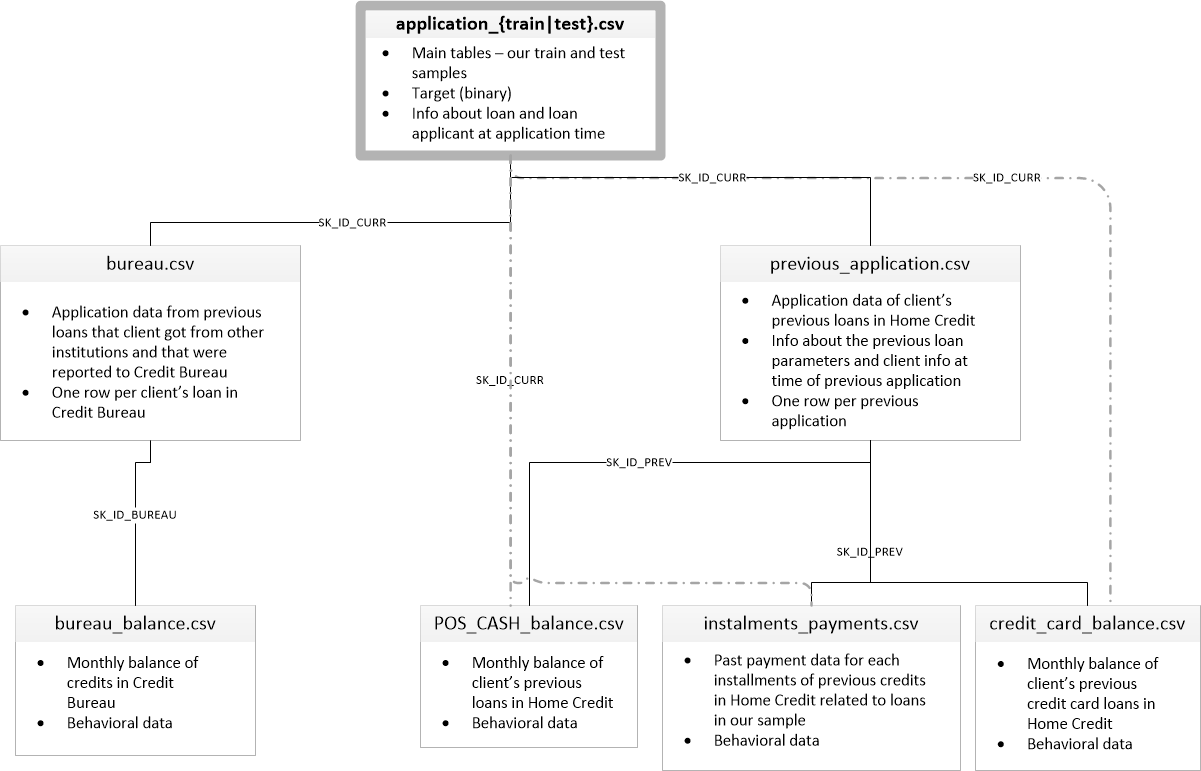

### Description résumée de chaque table

* **application_{train|test}.csv**


    * Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
    * Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.


* **bureau.csv**


    * Tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
    * Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le bureau de crédit avant la date de la demande.


* **bureau_balance.csv**


    * Soldes mensuels des crédits précédents au bureau de crédit.
    * Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes
    
  
* **POS_CASH_balance.csv**


    * Instantanés du solde mensuel des précédents POS (points de vente) et des prêts en espèces que le demandeur avait avec la société "Prêt à dépenser".
    * Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent chez "Prêt à dépenser" (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans laquelle nous avons un historique observable pour les crédits précédents).
    
 
* **credit_card_balance.csv**


    * Instantanés du solde mensuel des cartes de crédit précédentes que le demandeur a chez "Prêt à dépenser".
    * Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent chez "Prêt à dépenser" (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).


* **previous_application.csv**


    * Toutes les demandes précédentes de crédit immobilier des clients ayant des crédits dans notre échantillon.
    * Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.
  

* **installments_payments.csv**


    * Historique de remboursement des crédits précédemment décaissés en Crédit Logement relatifs aux crédits de notre échantillon.
    * Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
    * Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit "Prêt à dépenser" lié aux crédits de notre échantillon.
    

* **HomeCredit_columns_description.csv**


    * Ce fichier contient les descriptions des colonnes des différents fichiers de données.
    

## [3. Travaux préliminaires](#plan)<a class="anchor" id="3"></a>

### [3.1 Chargement des bibliothèques](#plan)<a class="anchor" id="3.1"></a>

Commençons par charger les bibliothèques et modules essentiels. Nous allons également définir la limite maximale d'affichage des colonnes et des lignes sur None pour que l'on puisse voir l'intégralité du DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
    
import warnings
warnings.filterwarnings('ignore')

import plotly

plotly.io.orca.config.executable = "C:\Anaconda3\envs\env\orca.cmd"
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

#for 100% jupyter notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [15]:
import plotly.io as pio
pio.orca.config
# pio.orca.status

orca configuration
------------------
    server_url: None
    executable: C:\Anaconda3\envs\env\orca.cmd
    port: None
    timeout: None
    default_width: None
    default_height: None
    default_scale: 1
    default_format: png
    mathjax: https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js
    topojson: None
    mapbox_access_token: None
    use_xvfb: auto

constants
---------
    plotlyjs: C:\Anaconda3\envs\env\lib\site-packages\plotly\package_data\plotly.min.js
    config_file: C:\Users\henri\.plotly\.orca


### [3.2 Définition de fonctions utiles](#plan)<a class="anchor" id="3.2"></a>

L'ensemble du Notebook a été créé sous forme modulaire. Chacun des blocs de code récurrents a été mis en fonction pour éliminer le code redondant.

In [17]:
def load_all_tables(directory_path = '', verbose = True):
    
    '''
    Fonction pour charger les tables
    
    Input:
        directory_path: str, default = ''
            Path of directory in which tables are stored in
        verbose: bool, default = True
            Whether to keep verbosity or not
        
    '''
    
    if verbose:
        print("Chargement de toutes les tables...")
        start = datetime.now()
    
    #making all the variables global to be used anywhere in the notebook
    global application_train, application_test, bureau, bureau_balance, cc_balance, installments_payments, POS_CASH_balance, previous_application
    
    application_train = pd.read_csv(directory_path + 'application_train.csv')
    if verbose:
        print("Table application_train.csv chargée.")
       
    application_test = pd.read_csv(directory_path + 'application_test.csv')
    if verbose:
        print("Table application_test.csv chargée.")

    bureau = pd.read_csv(directory_path + 'bureau.csv')
    if verbose:
        print("Table bureau.csv chargée.")

    bureau_balance = pd.read_csv(directory_path + 'bureau_balance.csv')
    if verbose:
        print("Table bureau_balance.csv chargée.")

    cc_balance = pd.read_csv(directory_path + 'credit_card_balance.csv')
    if verbose:
        print("Table credit_card_balance.csv chargée.")

    installments_payments = pd.read_csv(directory_path + 'installments_payments.csv')
    if verbose:
        print("Table installments_payments.csv chargée.")

    POS_CASH_balance = pd.read_csv(directory_path + 'POS_CASH_balance.csv')
    if verbose:
        print("POS_CASH_balance.csv chargée.")

    previous_application = pd.read_csv(directory_path + 'previous_application.csv')
    if verbose:
        print("Table previous_application.csv chargée.")
        print("Done.")
        print(f'Temps de chargement des 8 tables = {datetime.now() - start}')

In [18]:
def nan_df_create(data):
    
    '''
    Fonction pour créer un dataframe des % de NaN pour chaque colonne d'un dataframe
    
    Inputs:
        data: 
            DataFrame
    
    Returns:
        DataFrame of NaN percentages
    '''
    
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})
    
    # Trie par ordre décroissant des % de NaN
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

In [22]:
def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
    
    '''
    
    Fonction pour dessiner le Bar Plots des % de NaN pour chaque colonne avec des valeurs manquantes
    
    Inputs:
        df_nan: 
            DataFrame of NaN percentages
        title_name: 
            Name of table to be displayed in title of plot
        tight_layout: bool, default = True
            Whether to keep tight layout or not
        figsize: tuple, default = (20,8)
            Figure size of plot    
        grid: bool, default = False
            Whether to draw gridlines to plot or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels

    '''
    
    # Vérifier s'il ya des colonnes contenant des NaNs.
    if df_nan.percent.sum() != 0:
        print(f"Nombre de colonnes contenant des NaNs : {df_nan[df_nan['percent'] != 0].shape[0]} columns")
        
        # Dessiner le Bar-Plot pour les % des NaNs (uniquement pour les colonnes avec un pourcentage non nul de valeurs NaN)
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x= 'column', y = 'percent', data = df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation = rotation)
        plt.xlabel('Nom de la colonne')
        plt.ylabel('Pourcentage de NaNs')
        plt.title(f'Pourcentage de NaNs dans la table {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"Le dataframe {title_name} ne contient aucun NaN.")

In [114]:
class correlation_matrix:
    '''
    Class pour afficher le heatmap de la matrice de corrélation et imprimer les features les plus corrélées avec la Target.
    Contient 3 méthodes:
        1. init method
        2. plot_correlation_matrix method
        3. target_top_corr method
    '''
    
    def __init__(self, data, columns_to_drop, figsize = (25,23), mask_upper = True, tight_layout = True, 
                  linewidth = 0.1, fontsize = 10, cmap = 'Blues'):  
        '''  
        Fonction pour initialiser les instances de la classe correlation_matrix. 
        
        Inputs:
            data: DataFrame
                The DataFrame from which to build correlation matrix
            columns_to_drop: list
                Columns which have to be dropped while building the correlation matrix (for example the Loan ID)
            figsize: tuple, default = (25,23)
                Size of the figure to be plotted
            mask_upper: bool, default = True
                Whether to plot only the lower triangle of heatmap or plot full.
            tight_layout: bool, default = True
                Whether to keep tight layout or not
            linewidth: float/int, default = 0.1
                The linewidth to use for heatmap
            fontsize: int, default = 10
                The font size for the X and Y tick labels
            cmap: str, default = 'Blues'
                The colormap to be used for heatmap

        Returns:
            None
        '''
        
        self.data = data
        self.columns_to_drop = columns_to_drop
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.tight_layout = tight_layout
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap 
                 
    def plot_correlation_matrix(self):
        '''
        Fonction pour dessiner le Heatmap de la matrice de corrélation.
        
        Inputs:
            self
        
        Returns:
            None
        '''
        
        print('-' * 100)
        # construction du dataframe de corrélation
        self.corr_data = self.data.drop(self.columns_to_drop + ['TARGET'], axis = 1).corr()

        if self.mask_upper:
            # masquage du heatmap pour montrer seulement le triangle inférieur. Pour économiser de la mémoire.
            mask_array = np.ones(self.corr_data.shape)
            mask_array = np.triu(mask_array)
        else:
            mask_array = np.zeros(self.corr_data.shape)

        plt.figure(figsize = self.figsize, tight_layout = self.tight_layout)
        sns.heatmap(self.corr_data, annot = False, mask = mask_array, linewidth = self.linewidth, cmap = self.cmap)
        plt.xticks(rotation = 90, fontsize = self.fontsize)
        plt.yticks(fontsize = self.fontsize)
        plt.title("Correlation Heatmap pour les features numériques")
        plt.show()
        print("-"*100)
    
    def target_top_corr(self, target_top_columns = 10):
        '''
        Fonction pour retourner les features les mieux corrélées avec la Target.
        
        Inputs:
            self
            target_top_columns: int, default = 10
                The number of top correlated features with target to display
            
        Returns:
            Top correlated features DataFrame.
        '''
        
        phik_target_arr = np.zeros(self.corr_data.shape[1])
        #calculating the Phik-Correlation with Target
        for index, column in enumerate(self.corr_data.columns):
            phik_target_arr[index] = self.data[['TARGET', column]].phik_matrix().iloc[0,1]
        #getting the top correlated columns and their values
        top_corr_target_df = pd.DataFrame({'Nom de la colonne': self.corr_data.columns, 'Phik-Correlation' : phik_target_arr})
        top_corr_target_df = top_corr_target_df.sort_values(by = 'Phik-Correlation', ascending = False)
        
        return top_corr_target_df.iloc[:target_top_columns]

In [25]:
def plot_phik_matrix(data, categorical_columns, figsize = (20,20), mask_upper = True, tight_layout = True, linewidth = 0.1, fontsize = 10, cmap = 'Blues', show_target_top_corr = True, target_top_columns = 10):
    
    '''
    Fonction pour calculer la matrice de corrélation Phi_k (bibliothèque PhiK) pour les features catégorielles.
    
    Inputs:
        data: DataFrame
            The DataFrame from which to build correlation matrix
        categorical_columns: list
            List of categorical columns whose PhiK values are to be plotted
        figsize: tuple, default = (25,23)
            Size of the figure to be plotted
        mask_upper: bool, default = True
            Whether to plot only the lower triangle of heatmap or plot full.
        tight_layout: bool, default = True
            Whether to keep tight layout or not
        linewidth: float/int, default = 0.1
            The linewidth to use for heatmap
        fontsize: int, default = 10
            The font size for the X and Y tick labels
        cmap: str, default = 'Blues'
            The colormap to be used for heatmap
        show_target_top_corr: bool, default = True
            Whether to show top/highly correlated features with Target.
        target_top_columns: int, default = 10
            The number of top correlated features with target to display
    '''
    
    # récupérer d'abord uniquement les caractéristiques catégorielles
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-'*100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize = figsize, tight_layout = tight_layout)
    sns.heatmap(phik_matrix, annot = False, mask = mask_array, linewidth = linewidth, cmap = cmap)
    plt.xticks(rotation = 90, fontsize = fontsize)
    plt.yticks(rotation = 0, fontsize = fontsize)
    plt.title("Phi-K Correlation Heatmap pour les features catégorielles")
    plt.show()
    print("-"*100)

    if show_target_top_corr:
        #Seeing the top columns with highest correlation with the target variable in application_train
        print("Les catégories avec les plus hautes valeurs du coef de corrélation Phi_k avec la cible (Target) sont:")
        phik_df = pd.DataFrame({'Nom de la colonne' : phik_matrix.TARGET.index[1:], 'Phik-Correlation' : phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by = 'Phik-Correlation', ascending = False)
        display(phik_df.head(target_top_columns))
        print("-"*100) 

In [76]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    '''
    Fonction pour dessiner les Bar Plots des features catégorielles.
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    
    print(f"Nombre total de modalités da la colonne {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    # distribution par catégorie
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution de la colonne {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Effectifs')
    
    # afficher la distribution des catégories pour les défaillants (Target = 1).
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Pourcentage de défaillants par catégorie')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Pourcentage de défaillants pour chaque modalité de la colonne {column_name}', pad = 20)
    plt.show()

In [59]:
def plot_categorical_variables_pie(data, column_name, plot_defaulter = True, hole = 0):
    
    '''
    Fonction pour dessiner les Pie Plots des variables catégorielles.
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        plot_defaulter: bool
            Whether to plot the Pie Plot for Defaulters or not
        hole: int, default = 0
            Radius of hole to be cut out from Pie Chart
    '''
    
    if plot_defaulter:
        cols = 2
        specs = [[{'type' : 'domain'}, {'type' : 'domain'}]]
        titles = [f'Distribution {column_name} tous Targets', f'% de défaillants par modalité de {column_name}']
    else:
        cols = 1
        specs = [[{'type': 'domain'}]]
        titles = [f'Distribution de la colonne {column_name} pour tous les Targets']
        
    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index
    
    fig = make_subplots(rows = 1, cols = cols, 
                       specs = specs, 
                       subplot_titles = titles)
    
    fig.add_trace(go.Pie(values = values_categorical, labels = labels_categorical, hole = hole, 
                         textinfo = 'label+percent', textposition = 'inside'), row = 1, col = 1)
    
    if plot_defaulter:
        percentage_defaulter_per_category = data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()
        percentage_defaulter_per_category.dropna(inplace = True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(2)
        
        fig.add_trace(go.Pie(values = percentage_defaulter_per_category, labels = percentage_defaulter_per_category.index, 
                             hole = hole, textinfo = 'label+value', hoverinfo = 'label+value'), row = 1, col = 2)
        
    fig.update_layout(title = f'Distribution de la colonne {column_name}')
    fig.show()

In [64]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Fonction pour imprimer les statistiques de base des catégories uniques des variables catégorielles
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"Les modalités uniques de la colonne '{column_name}'sont:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Effectifs de chaque modalité :\n{data[column_name].value_counts()}")
        print('-'*100)

In [9]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

In [28]:
def plot_cdf(data, column_name, log_scale = False, figsize = (12,8)):
    
    '''
    Fonction pour dessiner la CDF (fonction de distribution cululative) des variables continues
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose CDF is to be plotted
        log_scale: bool, default = True
            Whether to use log-scale (for widely varying values) or not
        figsize: tuple, default = (12,8)
            The size of figure to be plotted    
    '''
    
        
    percentile_values = data[[column_name]].dropna().sort_values(by = column_name)
    percentile_values['Percentile'] = [ele / (len(percentile_values) - 1) for ele in range(len(percentile_values))]

    plt.figure(figsize = figsize)
    if log_scale:
        plt.xscale('log')
        plt.xlabel(column_name + ' - (log-scale)')
    else:
        plt.xlabel(column_name)
    plt.plot(percentile_values[column_name], percentile_values['Percentile'], color = 'red')
    plt.ylabel('Probabilité')
    plt.title('CDF de {}'.format(column_name))
    plt.show()

In [81]:
def print_percentiles(data, column_name, percentiles = None):
    
    '''
    Fonction pour imprimer les percentiles d'une colonne.
    
    Inputs:
        data: DataFrame
            The DataFrame from which to print percentiles
        column_name: str
            Column's name whose percentiles are to be printed
        percentiles: list, default = None
            The list of percentiles to print, if not given, default are printed
    '''
    
    print('-'*100)
    if not percentiles:
        percentiles = list(range(0,80,25)) + list(range(90,101,2))
    for i in percentiles:
        print(f'Le {i}ième percentile de la colonne {column_name} est {np.percentile(data[column_name].dropna(), i)}')
    print("-"*100)

In [30]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'CDF', 'box', 'violin'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    
    '''
    Fonction pour dessiner la distribution des variables continues
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''

    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Défaillants', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Défaillants', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('DEnsité de probabilité')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot de {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot de {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot de {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

## [4. Analyse exploratoire des données (EDA)](#plan)<a class="anchor" id="4"></a>

Pour l'analyse des données, nous suivrons les étapes suivantes :

* Pour chaque table, nous allons d'abord vérifier les statistiques de base comme le nombre d'enregistrements dans les tables, le nombre de fonctionnalités, le nombre de valeurs NaN, etc.

* Ensuite, nous allons explorer certaines des fonctionnalités par rapport à la variable cible pour chaque table. Nous utiliserons les graphiques suivants :
    * Pour les variables catégorielles, nous utiliserons principalement des Graphiques à barres et des Pie Charts
    * Pour les variables continues/numériques, nous utiliserons des Box-Plots, PDFs (Fonction de densité de probailité), CDF (Fonction de distribution cumulative) et Violin-Plots.
       
* Nous allons tirer des observations de chaque graphique et noter les informations importantes générées à partir des graphiques.
           

**Note 1 :**

* Pour les variables catégorielles, nous tracerons les graphiques à barres et les graphiques à secteurs. L'utilisation de Bar and Pie Plot sera basée sur le nombre de catégories uniques présentes dans une fonctionnalité. Si une entité a trop de catégories, leur affichage sur les graphiques à secteurs peut être fastidieux, et le graphique à barres affiche un meilleur travail pour chaque catégorie. Le graphique à barres sera également préféré lorsque les proportions de toutes les catégories sont plus ou moins les mêmes pour identifier les petites différences.

* Nous suivrons la stratégie mentionnée ci-dessous pour tracer les caractéristiques catégorielles dans l'ensemble du bloc-notes :


    1. Tout d'abord, nous allons tracer la distribution de chaque catégorie dans l'ensemble des données, dans le premier sous-parcelle.
    2. Ensuite, dans la deuxième sous-intrigue, nous tracerons le pourcentage de défaillants de chaque catégorie, c'est-à-dire avec Target = 1.
    

* Par exemple, disons si une fonctionnalité contient le genre, à savoir. Mâle et Femelle, donc pour la première sous-parcelle, nous tracerons le nombre d'occurrences de chacun de Mâle et Femelle dans notre ensemble de données. Dans la deuxième sous-parcelle, nous allons tracer, parmi le nombres d'hommes présent dans l'ensemble de données, combien ou quel pourcentage d'hommes ont été trouvés par défaut. De même, nous le ferons pour les femmes. 


**Note 2 :**

Pour l'analyse des variables continues, nous utiliserons quatre types de graphiques selon les besoins, à savoir Distplot, CDF, Box-plots et Violin Plots.

**DistPlots :** 

Le distplot sera utilisé lorsque nous voulons voir les PDF de la variable continue. Ce PDF nous aidera à analyser où se trouvent la plupart de nos données.

**CDF :** 

Les CDF peuvent être utilisés comme une extension des PDF pour voir quel pourcentage de points se situe en dessous d'une certaine valeur seuil. Cela nous donnerait une bonne estimation de la distribution de la majorité des données.

**Box-Plots :**

Les box-plots sont utiles lorsque nous voulons analyser toute la plage de valeurs de notre variable continue. Il montre les 25e, 50e et 75e centiles dans un seul graphique. De plus, cela donne également quelques idées liées à la présence de valeurs aberrantes dans un ensemble de valeurs donné.

**Violin-Plots :** 

Les Violin-Plots ont tendance à combiner les caractéristiques des Distplots et des Box-Plots. Verticalement, ils imitent la boîte à moustaches et montrent les quantiles, la plage de valeurs et horizontalement, ils montrent le PDF de la variable continue.

#### Chargement de toutes les tables

In [31]:
load_all_tables("data/")

Chargement de toutes les tables...
Table application_train.csv chargée.
Table application_test.csv chargée.
Table bureau.csv chargée.
Table bureau_balance.csv chargée.
Table credit_card_balance.csv chargée.
Table installments_payments.csv chargée.
POS_CASH_balance.csv chargée.
Table previous_application.csv chargée.
Done.
Temps de chargement des 8 tables = 0:00:28.276402


### [4.1 application_train.csv et application_test.csv](#plan)<a class="anchor" id="4.1"></a>

##### Description:

* La table application_train.csv est constituée de données statiques relatives aux Emprunteurs avec des libellés. Chaque ligne représente une demande de prêt. 

* Le fichier application_test.csv contient l'ensemble de données de test et est similaire à application_train.csv, sauf que la colonne TARGET a été omise, ce qui doit être prédit à l'aide de modèles prédictifs statistiques et d'apprentissage automatique.

#### Basic Stats

In [32]:
print('-'*100)
print(f'Format du jeu de données application_train.csv : {application_train.shape}')
print('-'*100)
print(f'Nombre de données dupliquées dans le jeu de données application_train.csv : {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*100)
display(application_train.head())

----------------------------------------------------------------------------------------------------
Format du jeu de données application_train.csv : (307511, 122)
----------------------------------------------------------------------------------------------------
Nombre de données dupliquées dans le jeu de données application_train.csv : 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [33]:
print('-'*100)
print(f'Format du jeu de données application_test.csv : {application_test.shape}')
print('-'*100)
print(f'Nombre de données dupliquées dans le jeu de données application_test.csv : {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)
display(application_test.head())

----------------------------------------------------------------------------------------------------
Format du jeu de données application_test.csv : (48744, 121)
----------------------------------------------------------------------------------------------------
Nombre de données dupliquées dans le jeu de données application_test.csv : 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

##### Observations et Conclusions:

<ol><li><b>application_train.csv:</b>
    <ul>
    <li>Le fichier application_train.csv contient environ 307 000 enregistrements et 122 features. Ces features contiennent les statistiques personnelles appartenant à un client particulier telles que son âge, ses revenus, le type de prêt, les statistiques de l'appartement, etc.</li>
    <li>Il y a 307 511 SK_ID_CURR uniques qui représentent des demandes de prêt uniques.</li>
    <li>Le champ TARGET(notre cible pour la modélisation) représente le statut par défaut du prêt, 0 signifie non-défaut et 1 pour défaillant.</li>
    </ul></li><br>
    <li><b>application_test.csv:</b><ul>
        <li>Le fichier application_test.csv contient  48 744 enregistrements et 121 fetaures. Ces features sont exactement celles qui se trouvent dans application_train.csv, sauf qu'il s'agit des ensembles d'apprentissage</li>
        <li>Il y a 48 744 SK_ID_CURR uniques qui représentent des demandes de prêt uniques.</li>
        <li>La colonne TARGET a été omise et doit être prédite à l'aide de modèles statistiques prédictifs et d'apprentissage automatique.</li>
        </ul></li></ol>

#### NaN Columns and Percentages

Nombre de colonnes contenant des NaNs : 67 columns


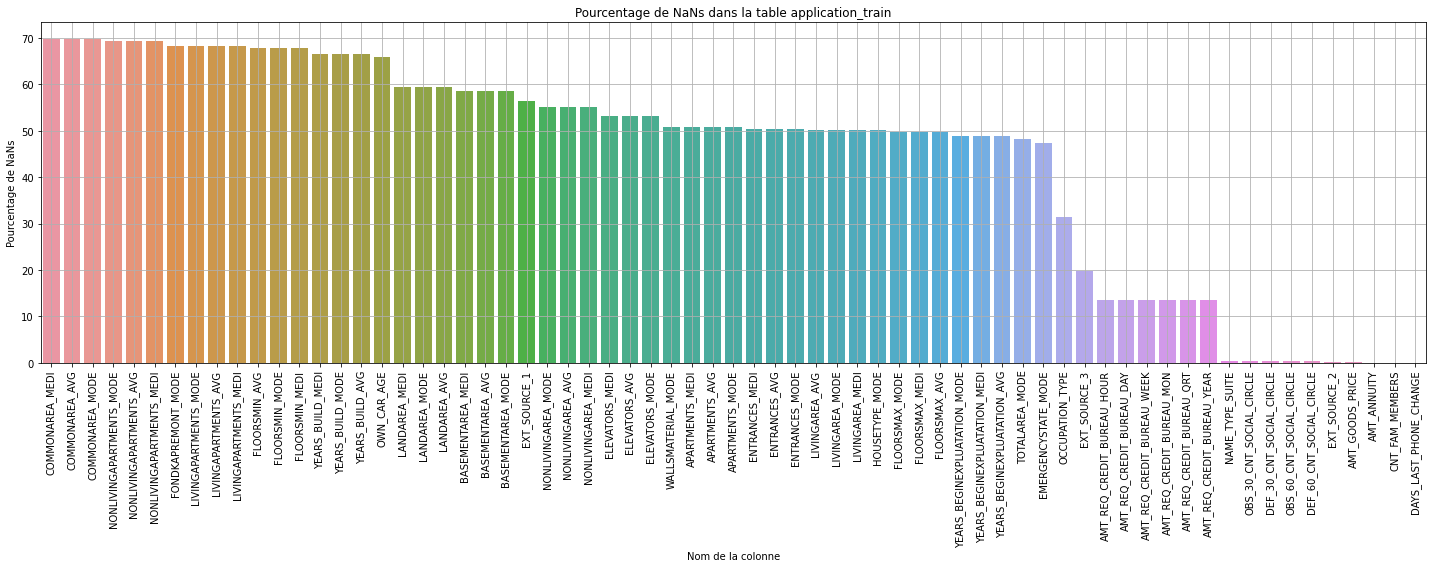

In [34]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

Nombre de colonnes contenant des NaNs : 64 columns


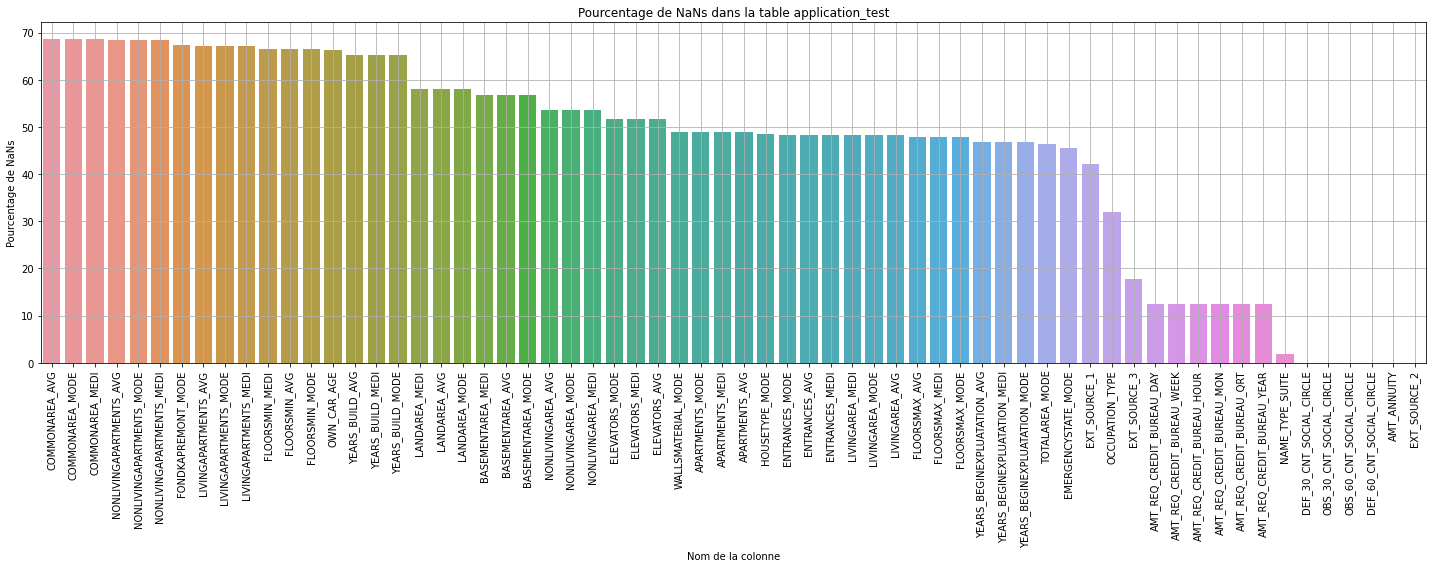

In [35]:
plot_nan_percent(nan_df_create(application_test), 'application_test', grid = True)

##### Observations et Conclusions:

<ol><li><b>application_train.csv :</b>
    <ul><li>Le graphique ci-dessus montre qu'il y a 67 colonnes sur 122 entités qui contiennent des valeurs NaN. S'il n'y avait qu'une ou deux colonnes qui avaient des valeurs NaN, nous aurions pu nous en tirer en éliminant simplement ces colonnes, mais pour un si grand nombre de colonnes, nous ne pouvons pas les supprimer telles quelles, car la perte d'informations pourrait être très élevée.<br >
    <li>Nous voyons que certaines colonnes comme relatives à "COMMONAREA", "NONLIVINAPARTMENT", etc. ont près de 70% de valeurs manquantes. Nous devrons trouver des techniques pour gérer ces nombreuses valeurs manquantes et voir ce qui fonctionnerait le mieux pour nos données.
    <li>Une autre chose à noter ici est que la plupart des colonnes qui ont plus de 50 % de valeurs manquantes sont liées aux statistiques des appartements de l'emprunteur. Il est très probable que ces valeurs n'aient pas été enregistrées lors de la saisie des données et pourraient être facultatives.</ul><br>
    </li>
    <li><b>application_test.csv :</b><ul>
        <li>Le nombre de colonnes avec des valeurs NaN (64) est très similaire à celui de l'application_train.</li>
        <li>Les pourcentages de valeurs NaN sont également assez similaires à ceux présents dans l'ensemble de données d'apprentissage. Cela signifie que les ensembles d'entraînement et de test sont à peu près de distribution similaire.</li>
        </ul>

#### Distribution de la feature Target (notre cible)

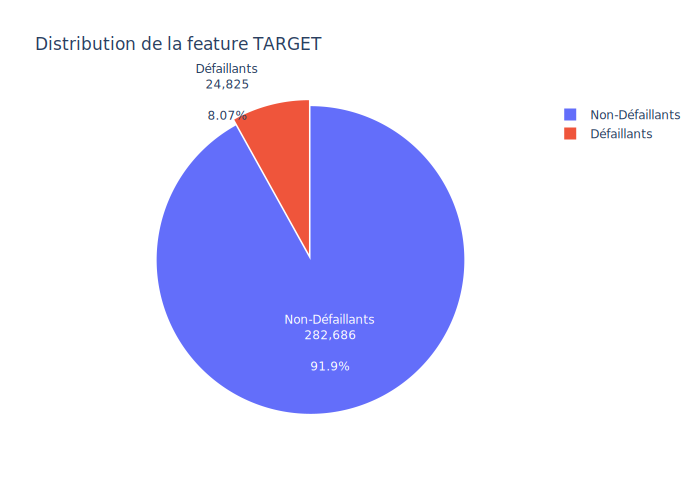

In [36]:
target_distribution = application_train.TARGET.value_counts()
labels = ['Non-Défaillants', 'Défaillants']

fig = go.Figure(data = [
        go.Pie(values = target_distribution, labels = labels, textinfo = 'label+percent+value' , pull = [0,0.04])], 
         layout = go.Layout(title = 'Distribution de la feature TARGET'))

fig.show(renderer = 'svg')

##### Observations et Conclusions :

<ul><li>À partir de la distribution de la variable cible, une chose que nous pouvons rapidement remarquer est le déséquilibre des données. Il n'y a que 8,07 % du total des prêts qui ont effectivement été en défaut. Cela signifie que les défaillants sont la classe minoritaire.
    <li>D'autre part, il y a 91,9% de prêts qui n'ont pas été en défaut. Ainsi, les Non-Défaillants seront notre classe majoritaire.
    <li>Les défaillants ont reçu une variable cible de 1 et les non-défaillants ont reçu une variable cible 0.
    <li>Pour les ensembles de données déséquilibrés, lors de la construction du modèle, nous ne pouvons pas alimenter les données telles quelles pour certains algorithmes, qui sont sensibles aux déséquilibres.
    <li>C'est le cas avec les métriques de performance. Pour un tel ensemble de données, la précision n'est généralement pas la bonne mesure car la précision serait généralement biaisée en faveur de la classe majoritaire. Nous pouvons utiliser d'autres métriques telles que le score ROC-AUC, la perte de log, le score F1, la matrice de confusion pour une meilleure évaluation du modèle.
    <li>Une autre chose importante à noter ici est qu'il y a très peu de gens qui font réellement défaut, et ils ont tendance à montrer une sorte de comportement différent. Ainsi, dans de tels cas de détection de fraude, de défaut et d'anomalie, nous devons également nous concentrer sur les valeurs aberrantes, et nous ne pouvons pas les supprimer, car elles pourraient être le facteur de différenciation entre défaillant et non défaillant.

#### Phi-K matrix

Nous avons tracé une carte thermique (heatmap) des valeurs du coefficient de corrélation Phi-K entre chacune des caractéristiques avec l'autre. <br>
Le coefficient Phi-K est similaire au coefficient de corrélation, sauf qu'il peut être utilisé avec une paire de caractéristiques catégorielles pour vérifier si une caractéristique présente une sorte d'association avec l'autre caractéristique catégorielle. Sa valeur maximale peut être 1, ce qui montrerait une association maximale entre deux variables catégorielles.

----------------------------------------------------------------------------------------------------


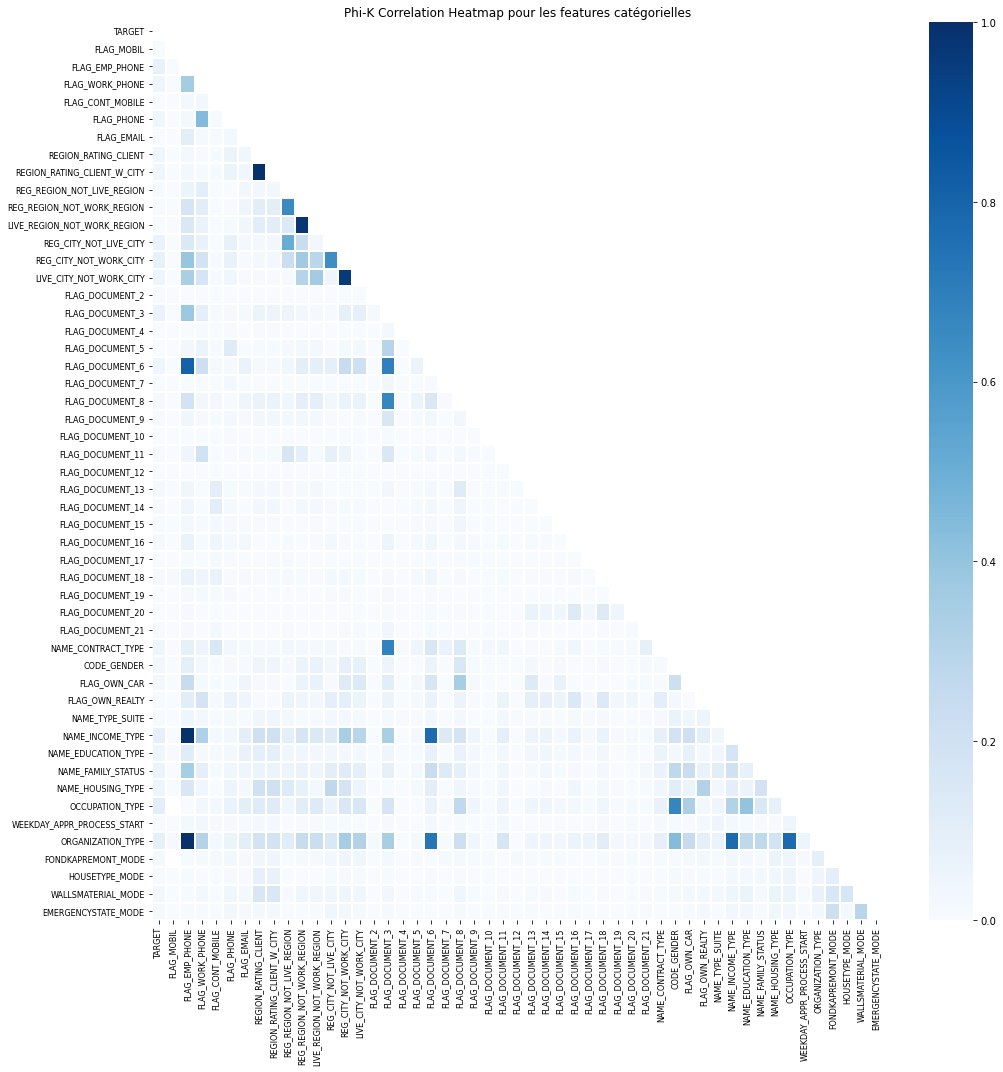

----------------------------------------------------------------------------------------------------
Les catégories avec les plus hautes valeurs du coef de corrélation Phi_k avec la cible (Target) sont:


,Nom de la colonne,Phik-Correlation
43,OCCUPATION_TYPE,0.102846
45,ORGANIZATION_TYPE,0.089164
39,NAME_INCOME_TYPE,0.084831
12,REG_CITY_NOT_WORK_CITY,0.079946
1,FLAG_EMP_PHONE,0.072087
11,REG_CITY_NOT_LIVE_CITY,0.069588
15,FLAG_DOCUMENT_3,0.069525
41,NAME_FAMILY_STATUS,0.056043
42,NAME_HOUSING_TYPE,0.051107
13,LIVE_CITY_NOT_WORK_CITY,0.050956


----------------------------------------------------------------------------------------------------


In [37]:
categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + application_train.dtypes[
                                    application_train.dtypes == 'object'].index.tolist()
plot_phik_matrix(application_train, categorical_columns, figsize = (15,15), fontsize = 8)

##### Observations et Conclusions:

<ol><li>À partir de la carte thermique (heatmap) ci-dessus de la corrélation Phi-K, nous voyons que la plupart des caractéristiques catégorielles ne sont pas corrélées les unes aux autres, mais certaines d'entre elles présentent une forte corrélation.</li>
    <li>Certaines des paires de catégories hautement corrélées sont :
        <ul><li>REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT : cela est compréhensible car ils raconteraient plus ou moins une histoire similaire.</li>
            <li>LIVE_REGION_NOT_WORK_REGION et REG_REGION_NOT_WORK_REGION</li>
            <li>NAME_INCOME_TYPE, ORGANIZATION_TYPE et FLAG_EMP_PHONE</li>
        </ul>
    </li>
    <li>Nous pouvons également voir une certaine corrélation entre le type d'organisation et le type de revenu d'un client. De même, nous voyons une corrélation entre le type de profession et le type d'organisation.</li>
    <li>Nous constatons que la catégorie OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY sont parmi les catégories les plus corrélées avec la variable TARGET. Ceux-ci peuvent être importants dans la tâche de classification et nécessiteraient une EDA supplémentaire</li></ol>
    

#### Matrice de corrélation des features

Nous allons tracer une carte thermique de la corrélation de chaque feature numérique par rapport aux autres features. Nous avons exclu la colonne SK_ID_CURR, car elle n'a aucune pertinence. Cette carte thermique nous aidera à identifier les features numériques hautement corrélées et nous aidera également à identifier les features fortement corrélées avec la variable cible Target.

----------------------------------------------------------------------------------------------------


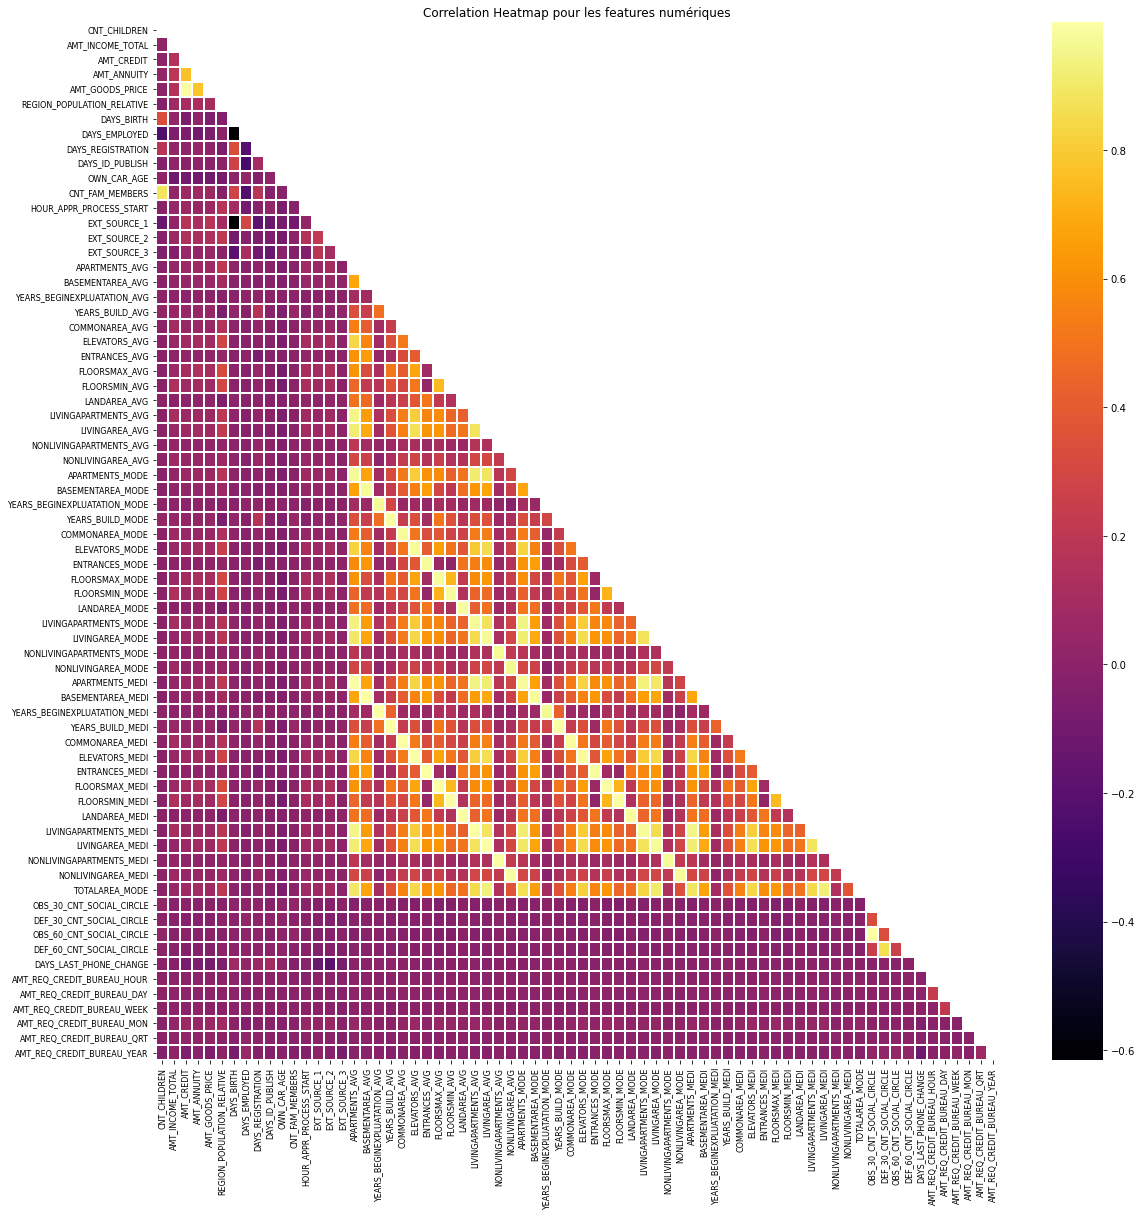

----------------------------------------------------------------------------------------------------


In [38]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns) - set(['TARGET']))
corr_mat = correlation_matrix(application_train, columns_to_drop, figsize = (17,17), fontsize = 8, cmap = 'inferno')
corr_mat.plot_correlation_matrix()

In [39]:
# Colonnes présentant le  coefficient de corrélatio phik avec la variable Target le plus élevé dans le jeu application_train 
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes présentant le  coefficient de corrélatio phik avec la variable Target :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns 

,Nom de la colonne,Phik-Correlation
15,EXT_SOURCE_3,0.247680
13,EXT_SOURCE_1,0.217846
14,EXT_SOURCE_2,0.213965
6,DAYS_BIRTH,0.102378
63,DAYS_LAST_PHONE_CHANGE,0.073218
7,DAYS_EMPLOYED,0.072095
9,DAYS_ID_PUBLISH,0.067766
4,AMT_GOODS_PRICE,0.059094
23,FLOORSMAX_AVG,0.058826
51,FLOORSMAX_MEDI,0.058595


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
    <li>La carte thermique (heatmap) représente un bon moyen pour montrer la valeur ou le niveau de corrélation que chaque feature particulière a avec toutes les autres.</li>
    <li>On peut observer que la majeure partie de la carte thermique contient une couleur violette, ce qui indique une très petite valeur de corrélation. Cela implique que la plupart des features ne sont en effet pas corrélées aux autres.</li>
    <li>Cependant, nous pouvons voir des nuances contrastées au milieu de la carte thermique. Ces nuances représentent une valeur élevée de corrélation entre les features. Ce sont les features qui sont liées aux statistiques des appartements.<br>
        Si nous regardons les features de application_train, nous pouvons clairement voir que les statistiques des appartements sont données en termes de moyenne, médiane et mode, on peut donc s'attendre à ce que la moyenne, la médiane et le mode soient corrélés les uns aux autres. Une autre chose à noter est que les features d'une catégorie particulière, par exemple la moyenne, sont également corrélées avec d'autres features moyennes, telles que le nombre d'ascenseurs, la surface habitable, la surface non habitable, la surface du sous-sol, etc.</li>
    <li>Nous constatons également une forte corrélation entre AMT_GOODS_PRICE et AMT_CREDIT, entre DAYS_EMPLOYED et DAYS_BIRTH. </li>
    <li>Nous ne voudrions pas de features fortement corrélées, car elles augmentent la complexité temporelle du modèle sans lui ajouter beaucoup de valeur. Par conséquent, nous supprimerions les features inter-corrélées.
    <li>Parmi toutes les features, nous constatons une forte corrélation pour les features EXT_SOURCE par rapport à la variable cible (Target). Ceux-ci peuvent être importants pour notre tâche de classification.</ol>

<b><u>Distribution de la feature catégorielle NAME_CONTRACT_TYPE</u></b>

Cette colonne contient des informations sur le type de prêt pour le demandeur donné. Selon la documentation fournie par la société "Prêt à dépenser", il existe deux types de prêts, à savoir les prêts renouvelables et les prêts de trésorerie.

In [65]:
# Voyons les modalités uniques de 'NAME_CONTRACT_TYPE'
print_unique_categories(application_train, 'NAME_CONTRACT_TYPE')

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'NAME_CONTRACT_TYPE'sont:
['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------


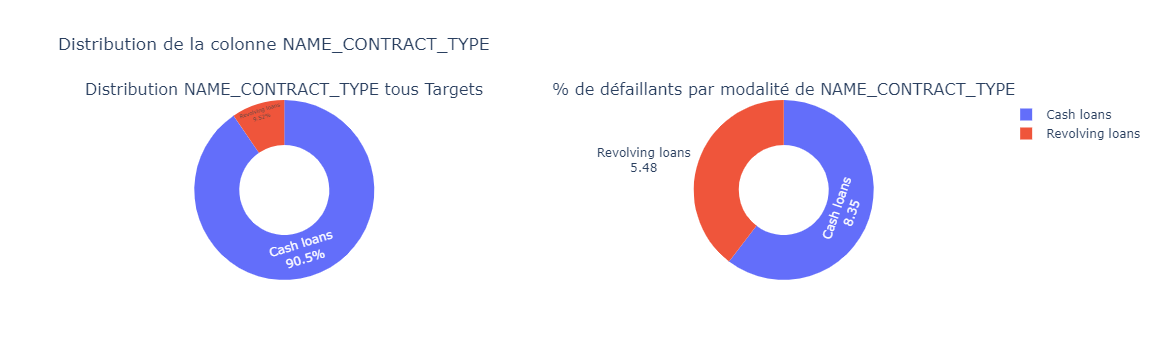

----------------------------------------------------------------------------------------------------


In [60]:
# plotting the Pie Plot for the column
plot_categorical_variables_pie(application_train, 'NAME_CONTRACT_TYPE', hole = 0.5)
print('-'*100)

##### Observations et Conclusions:

À partir du graphique ci-dessus, nous pouvons tirer les observations et conclusions suivantes :
<ol><li>À partir de la distribution globale :
         <ul><li>On peut voir que la plupart des prêts contractés par les clients sont des prêts en espèces.</li>
             <li>Seulement 9,52 % des personnes ont souscrit des prêts renouvelables.</li></ul></li>
<li>À partir du pourcentage de défaillants :
         <ul><li>Nous voyons qu'il y a plus de pourcentage de personnes qui ont fait défaut avec les prêts de trésorerie (8,35 %) par rapport à celles qui ont fait défaut avec les prêts renouvelables (5,48 %).</li></ul></ li></ol>

<b><u>Distribution de la feature catégorielle CODE_GENDER</u></b>

Cette colonne contient des informations sur le sexe du client/demandeur.<br>
Ici, <b>M</b> signifie <b>Homme</b> et <b>F</b> pour <b>Femme</b>.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'CODE_GENDER'sont:
['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
Effectifs de chaque modalité :
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------


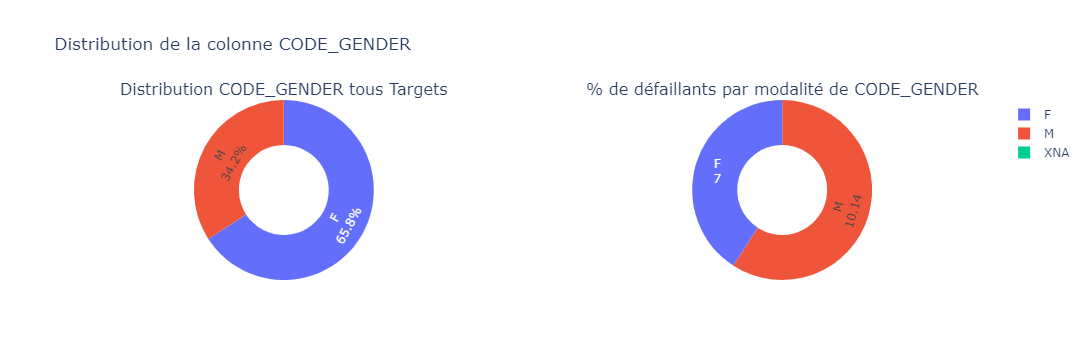

----------------------------------------------------------------------------------------------------


In [66]:
# Voyons les modalités uniques de la feature 'CODE_GENDER'
print_unique_categories(application_train, 'CODE_GENDER', show_counts = True)

#plotting the Pie Plot for the Column
plot_categorical_variables_pie(application_train, 'CODE_GENDER', hole = 0.5)
print('-'*100)

##### Observations et Conclusions:

La feature CODE_GENDER semble intéressante. Voici quelques points de discussion :
<ol><li>Le premier point à observer est qu'il y a 4 lignes dans la table application_train qui ont des genres 'XNA', qui n'ont pas beaucoup de sens, et peuvent être comptées comme des valeurs NaN. Puisqu'ils ne sont que 4 en nombre et n'appartiennent qu'à la catégorie non par défaut. Ainsi, nous pouvons éliminer ces lignes sans trop d'hésitation.</li>
     <li>À partir de la sous-parcelle 1, nous voyons que pour l'ensemble de données , il y a plus de femmes candidates (65,8 %) que d'hommes (34,2 %). </li>
     <li>Cependant, contrairement au nombre de candidatures féminines, le deuxième graphique montre que les candidats masculins ont tendance à échouer davantage (10,14%) que les candidatures féminines (7%). </li></ol>
Ainsi, on peut dire que les hommes ont plus tendance à faire défaut que les femmes selon l'ensemble de données donné.

<b><u>Distribution de la feature catégorielle FLAG_EMP_PHONE</u></b>

Cette colonne est une colonne booléenne, qui indique si le client a fourni ou non son numéro de téléphone professionnel.<br>
Ici, <b>1</b> signifie <b>Oui</b> et <b>0</b> signifie <b>Non</b>.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'FLAG_EMP_PHONE'sont:
[1 0]
----------------------------------------------------------------------------------------------------


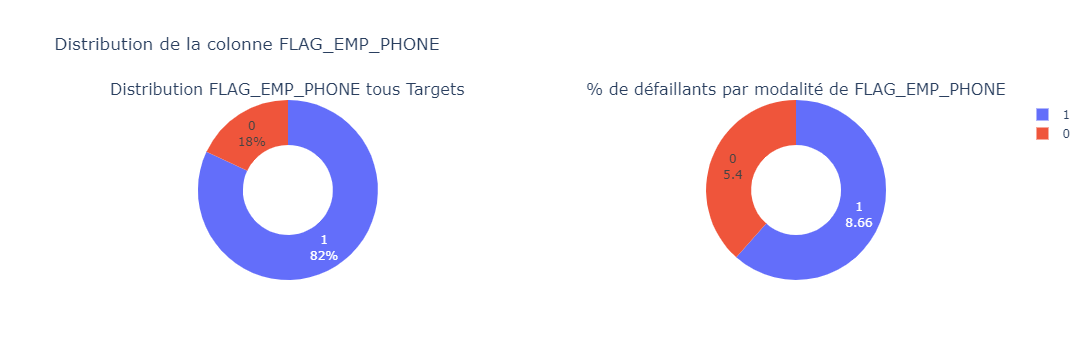

----------------------------------------------------------------------------------------------------


In [67]:
# Voyons les catégories uniques de  'FLAG_EMP_PHONE'
print_unique_categories(application_train, 'FLAG_EMP_PHONE')

#plotting the Pie Plot for the Column
plot_categorical_variables_pie(application_train, column_name = 'FLAG_EMP_PHONE', hole = 0.5)
print('-'*100)

##### Observations et Conclusions:

Cette feature contient deux modalités, c'est-à-dire si le client a fourni ou non son numéro de téléphone professionnel lors du processus d'inscription/de demande.
<ol><li>Nous constatons que la plupart des candidats ne fournissent pas leur numéro de téléphone professionnel (82 %) et que seuls 18 % ont fourni leur numéro de téléphone professionnel.
     <li>On peut également voir que la tendance par défaut pour ceux qui fournissent un numéro de téléphone professionnel est plus élevée que pour ceux qui ne fournissent pas de numéro de téléphone professionnel.<br>
         Cette caractéristique pourrait être attribuée au fait que les défaillants peuvent fournir leurs numéros de téléphone au travail afin qu'ils ne soient pas dérangés sur leur téléphone personnel.

<b><u>Distribution de la feature catégorielle REGION_RATING_CLIENT_W_CITY</u></b>

Cette feature est la note fournie par la société "Prêt à dépenser" à la région de chaque client en fonction des enquêtes qu'ils ont pu effectuer. Cette note prend également en compte la Ville dans laquelle réside le client. <br>
Il est important de prendre en compte la ville car même si certaines régions ont une bonne note dans une ville en particulier, mais que cette ville n'a pas une note élevée, le candidat recevra une note moyenne et non une note élevée.<br>
Il contient des valeurs comprises entre 1 et 3.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'REGION_RATING_CLIENT_W_CITY'sont:
[2 1 3]
----------------------------------------------------------------------------------------------------


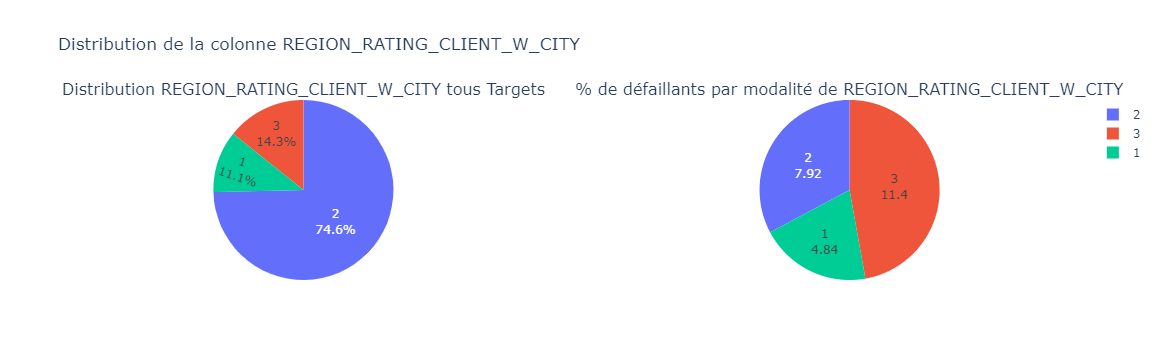

----------------------------------------------------------------------------------------------------


In [68]:
# Voyons les catégories uniques de 'REGION_RATING_CLIENT_W_CITY'
print_unique_categories(application_train, 'REGION_RATING_CLIENT_W_CITY')

#plotting the Pie Plot for the Column
plot_categorical_variables_pie(application_train, column_name = 'REGION_RATING_CLIENT_W_CITY')
print('-'*100)

##### Observations et Conclusions:

À partir des graphiques ci-dessus, nous pouvons tirer les enseignements suivants :
<ol><li>Nous voyons que la plupart des clients (74,6%) ont une note de région de 2. C'est la valeur moyenne qui est pour la plupart des candidats.<br>Très peu de candidats ont un note régionale de 1 (seulement 11,1 %) et certaines ont une note de 3 (14,3 %).</li>
     <li>Parmi les défaillants, on constate que la plupart des défaillants ont une note régionale de 3 (11,4 %) qui est comparativement plus élevée que les deux autres notes, c'est-à-dire que les clients avec une note de 1 ont un pourcentage de défaut de seulement 4,84 % et avec la note 2 ont un pourcentage de 7,92 %.</li>
     </ol>
Cela montre que la notation 3 pourrait être un attribut important pour prendre une décision sur les caractéristiques de défaut.

<b><u>Distribution de la feature catégorielle NAME_EDUCATION_TYPE</u></b>

Cette feature décrit le niveau d'enseignement le plus élevé que le client a atteint.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'NAME_EDUCATION_TYPE'sont:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Effectifs de chaque modalité :
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de catégories da la colonne NAME_EDUCATION_TYPE = 5


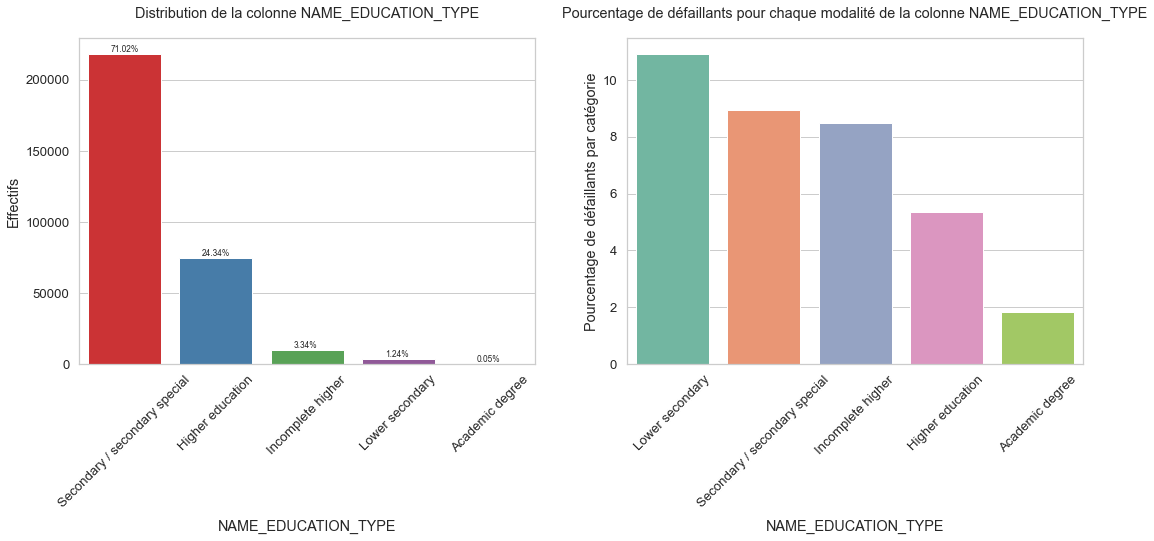

----------------------------------------------------------------------------------------------------


In [71]:
# Voyons les modalités uniques de 'NAME_EDUCATION_TYPE'
print_unique_categories(application_train, 'NAME_EDUCATION_TYPE', show_counts = True)

#plotting the Bar Plot for the Column
plot_categorical_variables_bar(application_train, column_name = 'NAME_EDUCATION_TYPE', rotation = 45, horizontal_adjust = 0.25)
print('-'*100)

##### Observations et Conclusions:

En regardant les graphiques ci-dessus, nous pouvons conclure ce qui suit :
<ol><li>Environ 71% des personnes n'ont fait leurs études que jusqu'au secondaire/secondaire spécial, avec 24,34% des clients ayant fait des études supérieures. Cela suggère que la plupart des clients/emprunteurs n'ont pas un niveau d'éducation élevé.</li>
     <li>D'après le deuxième graphique, nous voyons que les personnes qui ont fait leurs études jusqu'au premier cycle du secondaire seulement ont les caractéristiques de défaut les plus élevées, avec le secondaire et l'incomplet supérieur ayant des tendances de défaut similaires.</li>
     <li>Le groupe de personnes ayant fait des études supérieures a une tendance à l'échec comparativement plus faible, ce qui est également logique. En outre, les personnes ayant un diplôme universitaire affichent le taux de défaut le moins élevé. Cependant, le groupe Diplôme universitaire est très peu nombreux, il pourrait donc ne pas être très utile.</li></ol>

<b><u>Distribution de la feature catégorielle OCCUPATION_TYPE</u></b>

Cette fonctionnalité indique le type d'emploi du client. Cela peut être une caractéristique très importante qui pourrait décrire les caractéristiques de défaut d'un client. 

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'OCCUPATION_TYPE'sont:
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Nombre total de catégories da la colonne OCCUPATION_TYPE = 19


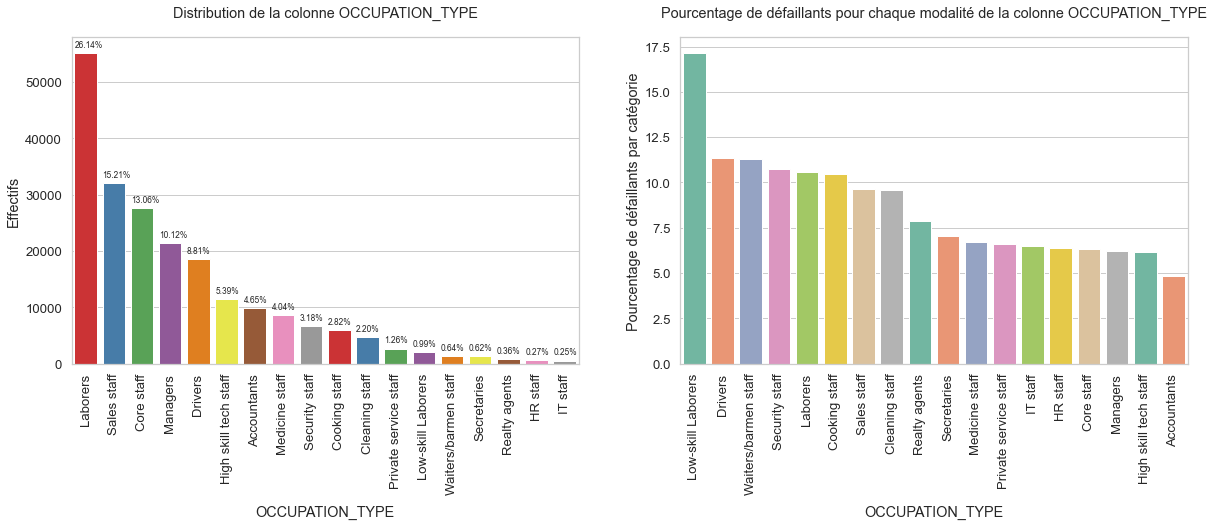

----------------------------------------------------------------------------------------------------


In [72]:
# Voyons les modalités uniques de 'OCCUPATION_TYPE'
print_unique_categories(application_train, 'OCCUPATION_TYPE')

#plotting the Bar Plot for the Column
plot_categorical_variables_bar(application_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

##### Observations et Conclusions:

A partir des graphiques du type d'occupation, nous pouvons tirer les observations suivantes :
<ol><li>Parmi les candidats, le type de profession le plus courant est celui des ouvriers, contribuant à près de 26% des candidatures. La deuxième profession la plus fréquente est le personnel de vente, suivi du personnel de base et des gestionnaires.</li>
     <li>Le taux de défaut des ouvriers peu qualifiés est le plus élevé parmi tous les types de professions (~17,5 %). Viennent ensuite les chauffeurs, les serveurs, le personnel de sécurité, les ouvriers, le personnel de cuisine, etc. Tous les emplois sont des emplois de bas niveau. Cela montre que les personnes à faible niveau d'emploi ont tendance à avoir un taux de défaut plus élevé.</li>
     <li>Les taux de défaut les plus bas sont parmi les comptables, le personnel de base, les gestionnaires, le personnel technique hautement qualifié, le personnel des ressources humaines, etc., qui occupent des postes de niveau moyen à élevé.</li></ol>

Ainsi, on peut conclure que les travailleurs de bas niveau ont tendance à avoir une tendance à la défaillance plus élevée que les emplois de niveau moyen-élevé.

<b><u>Distribution de la feature catégorielle ORGANIZATION_TYPE</u></b>

Semblable au type de profession, le type d'organisation (secteur d'activité) auquel appartient le client pourrait également être une caractéristique importante pour prédire le risque de défaut de ce client. 

Nombre de modalités de ORGANIZATION_TYPE = 58


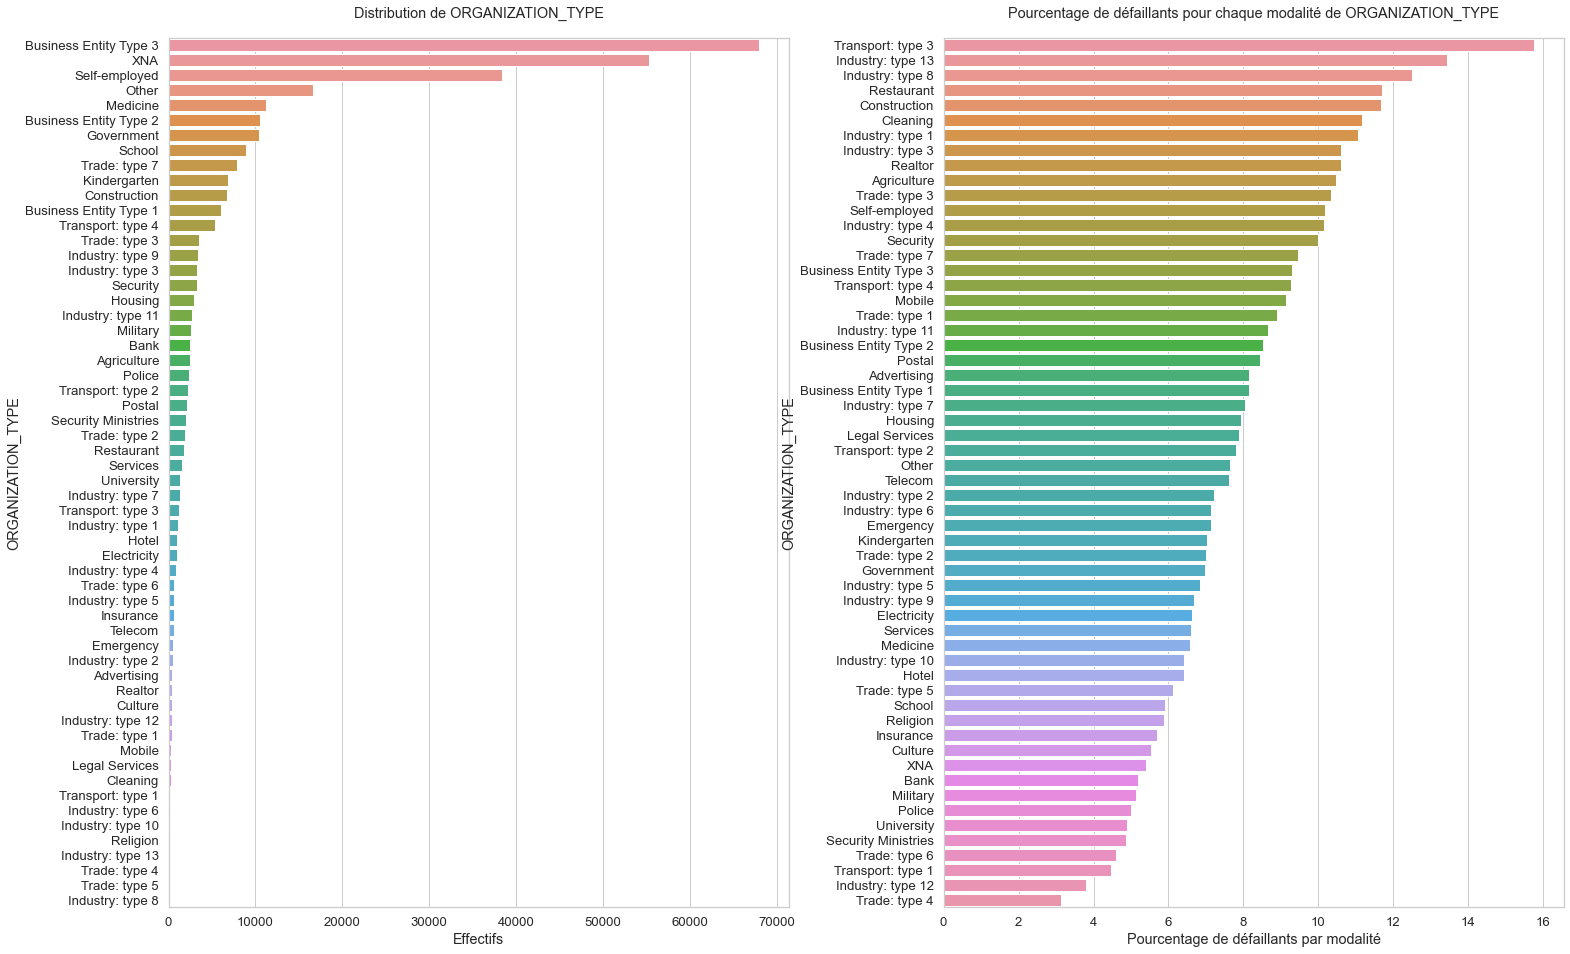

In [73]:
print(f"Nombre de modalités de ORGANIZATION_TYPE = {len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize = (25,16))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
sns.barplot(x = count_organization, y = count_organization.index)
plt.title('Distribution de ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Effectifs')
plt.ylabel('ORGANIZATION_TYPE')

plt.subplot(1,2,2)
percentage_default_per_organization = application_train[application_train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_default_per_organization, y = percentage_default_per_organization.index)
plt.title('Pourcentage de défaillants pour chaque modalité de ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Pourcentage de défaillants par modalité')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

##### Observations et Conclusions:

Il existe de nombreux types d'organisations auxquelles appartient le client, 58 pour être précis. Les graphiques ci-dessus donnent les observations suivantes :
<ol><li>Nous voyons que la plupart des candidats travaillent dans des organisations de type 'Business Entity Type3', 'XNA' ou 'Self Employed'. Le type d'organisation « XNA » pourrait probablement désigner un type d'organisation non classifié.</li>
     <li>À partir du deuxième graphique, nous remarquons que les demandeurs appartenant au « Transport : type 3 » ont la tendance à la défaillance la plus élevée par rapport au reste. Ils sont suivis d'organisations de types : 'Industrie : type 13', 'Industrie : type 8', 'Restaurant', 'Bâtiment', etc.</li>
     <li>Les organisations qui affichent les taux de défaut les plus bas sont "Commerce : type 4", "Industrie : type 12", etc.</li>
</ol>
Ces numéros de type diraient également quelque chose de plus sur l'Organisation, cependant, nous n'avons aucune information à ce sujet, nous nous en tiendrons donc à la dénomination qui nous est fournie uniquement.

<b><u>Distribution des features catégorielles REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY</u></b>
<br><br>
<i>REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY :</i><br>
Ces colonnes incluent des indicateurs indiquant si l'adresse permanente du client correspond à son adresse de contact ou à son adresse professionnelle ou non au niveau de la région <br><br>
<i>LIVE_CITY_NOT_WORK_CITY</i><br>
Cette colonne indique si l'adresse permanente du client correspond ou non à son adresse de contact au niveau de la ville.<br><br>
Ici, 1 indique des adresses différentes et 0 indique les mêmes adresses.

----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne REG_CITY_NOT_LIVE_CITY = 2


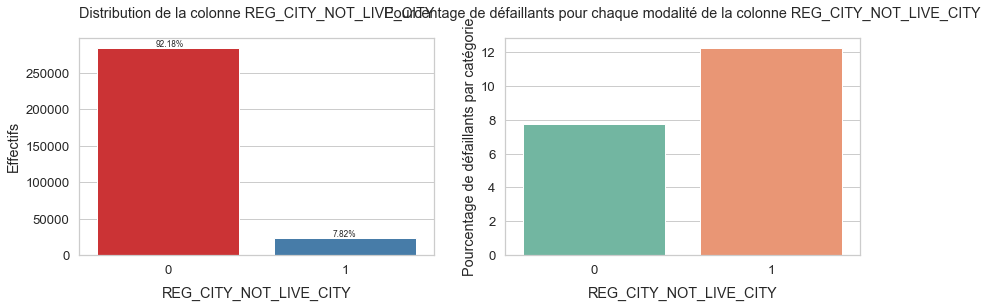

----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne REG_CITY_NOT_WORK_CITY = 2


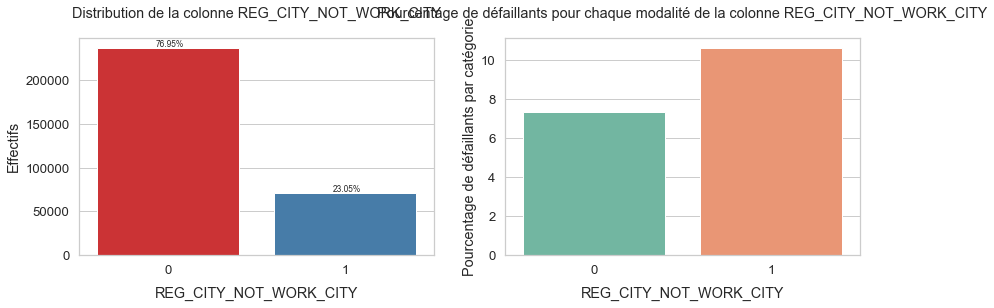

----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne LIVE_CITY_NOT_WORK_CITY = 2


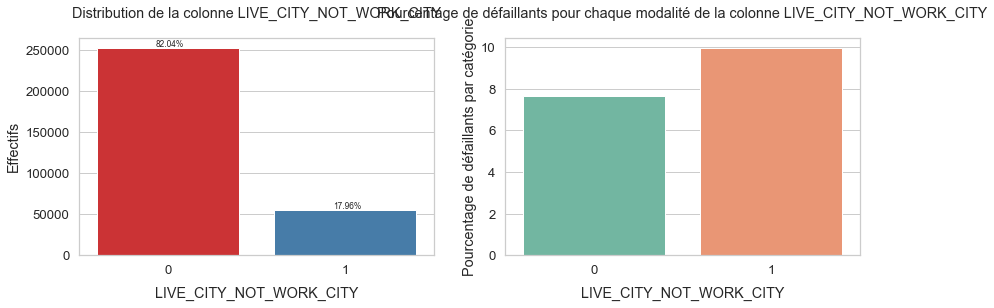

----------------------------------------------------------------------------------------------------


In [77]:
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_LIVE_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'LIVE_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

##### Observations et Conclusions:

À partir des 3 graphiques ci-dessus, les informations suivantes peuvent être tirées :
<ol><li>De tous les candidats, il n'y a qu'une minorité de candidats dont les adresses ne correspondent pas.
    <ul><li>Premièrement, il n'y a que 7,52% de personnes qui ont une adresse permanente différente de leur adresse de contact au niveau de la région.</li>
        <li>Deuxièmement, il y a environ 23,05 % de personnes qui ont une adresse permanente différente de leur adresse de travail au niveau de la région. Ce nombre plus élevé s'explique, car il est possible qu'ils travaillent dans une région différente par rapport à leur adresse permanente.</li>
        <li>Enfin, environ 17,96 % de personnes ont une adresse permanente différente de leur adresse de contact au niveau de la ville.</li>
    </ul>
    <li>
        <ul><li>Si nous examinons les caractéristiques par défaut, nous constatons qu'il existe une tendance maximale au défaut de ces personnes qui ont leurs adresses permanentes et de contact différentes au niveau de la région, suivies d'une adresse permanente et professionnelle différente et enfin d'une adresse permanente différente et l'adresse de contact au niveau de la ville.</li>
            <li>Pour tous les cas, on constate que la tendance au défaut des personnes qui ont des adresses différentes est plus élevée que celles qui ont la même adresse. Cela signifie que quelque part, cette différence d'adresse peut suggérer un risque de défaut.</li>
        </ul>
    </li>
    </ol>

<b><u>Distribution de la feature catégorielle FLAG_DOCUMENT_3</u></b>


Cette colonne contient le drapeau concernant un document qui devait être soumis par le demandeur. Sa valeur est 0 si le client a fourni le document et 1 sinon.

Nombre total de modalités da la colonne FLAG_DOCUMENT_3 = 2


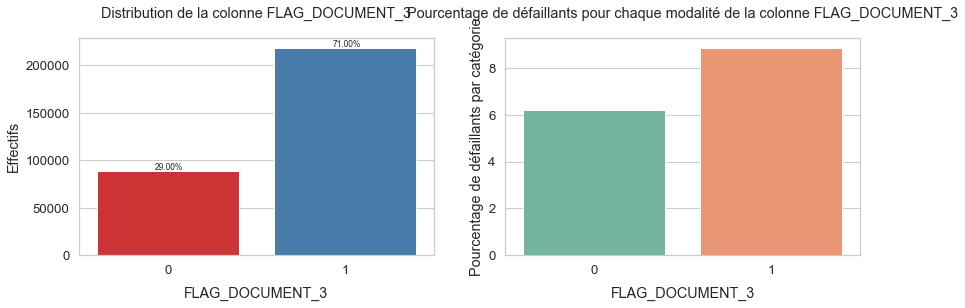

In [78]:
plot_categorical_variables_bar(application_train, column_name = 'FLAG_DOCUMENT_3', figsize = (14, 4), horizontal_adjust = 0.33)

##### Observations et Conclusions:

D'après le graphique ci-dessus, nous voyons que :
<ol><li>Nous voyons que la plupart des clients n'avaient pas fourni ce document (~71 %) et seulement 29 % l'ont fait. </li>
     <li>Nous voyons que ceux qui avaient fourni ce document avaient un taux de défaut plus élevé que ceux qui ne l'avaient pas fait. Cela signifie que les candidats qui avaient fourni le Document_3 ont tendance à faire plus défaut que ceux qui ne le font pas. </li>
     <li>Peut-être que cela pourrait être lié au certificat BPL ou à quelque chose, mais nous n'avons pas reçu cette information, nous ne pouvons donc rien dire sur le type de document qu'il aurait pu être.</li>
</ol>

#### Graphiques des variables continues

<b><u>Distribution de la variable continue Age of Applicant</u></b>

Pour l'ensemble de données, l'âge est indiqué en jours, ce qui peut être plus difficile à interpréter. Ainsi, nous allons créer une variable latente pour stocker les âges en années, ce qui serait plus facile à analyser et à interpréter.

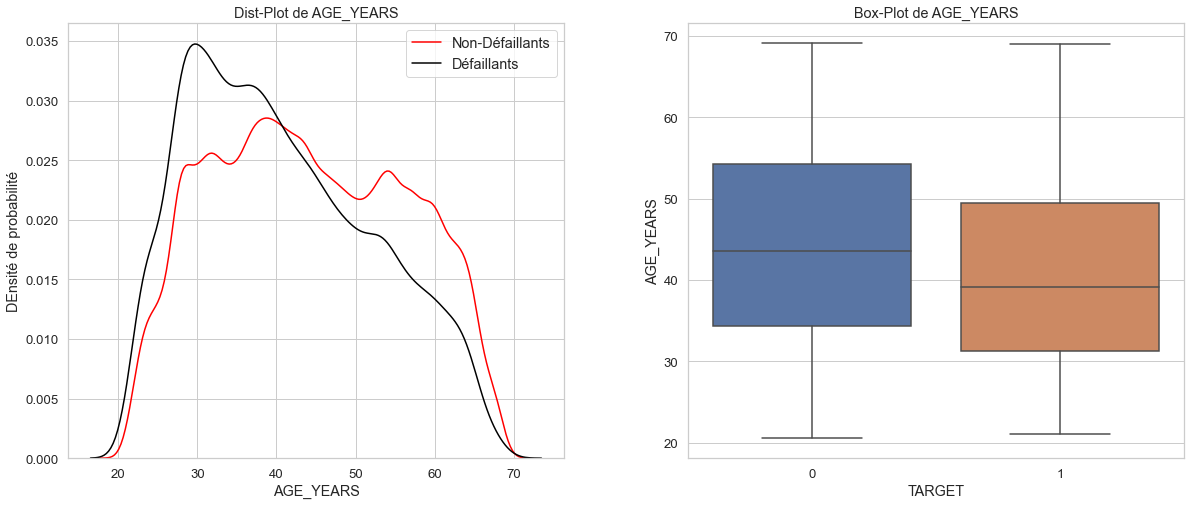

In [79]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365
plot_continuous_variables(application_train, 'AGE_YEARS', plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')

##### Observations et Conclusions:

À partir des deux graphiques ci-dessus, nous pouvons tirer des informations importantes.
<ol><li>À partir du distplot, nous pouvons observer le pic d'âge des personnes qui par défaut sont proches de 30 ans. De plus, à ce stade, les non-défaillants ont un PDF assez petit. Une autre chose à noter est que le PDF de Age for Defaulters commence un peu à gauche des non-Defaulters, et est également un peu dans toute la gamme. Cela signifie que les défaillants sont généralement plus jeunes que les non défaillants.</li>
     <li>A partir du box-plot aussi, nous pouvons mieux visualiser la même chose. L'âge des défaillants est généralement inférieur à celui des non-défauts. Tous les quantiles d'âge des défaillants sont inférieurs à ceux des non-défauts. La valeur du 75e centile des non-défauts est d'environ 54 ans, tandis que pour les défaillants, elle est proche de 49 ans.</li></ol>
Ces observations impliquent que les défaillants sont généralement plus jeunes que les non défaillants.

<b><u>Distribution des variables continues avec les features DAYS</u><b>



<b>DAYS_EMPLOYED</b><br>

Cette fonction indique le nombre de jours à compter du jour de la demande pendant lesquels le demandeur avait été employé. Pour une interprétation facile, nous allons convertir les jours en années.

----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_EMPLOYED est -17912.0
Le 25ième percentile de la colonne DAYS_EMPLOYED est -2760.0
Le 50ième percentile de la colonne DAYS_EMPLOYED est -1213.0
Le 75ième percentile de la colonne DAYS_EMPLOYED est -289.0
Le 90ième percentile de la colonne DAYS_EMPLOYED est 365243.0
Le 92ième percentile de la colonne DAYS_EMPLOYED est 365243.0
Le 94ième percentile de la colonne DAYS_EMPLOYED est 365243.0
Le 96ième percentile de la colonne DAYS_EMPLOYED est 365243.0
Le 98ième percentile de la colonne DAYS_EMPLOYED est 365243.0
Le 100ième percentile de la colonne DAYS_EMPLOYED est 365243.0
----------------------------------------------------------------------------------------------------


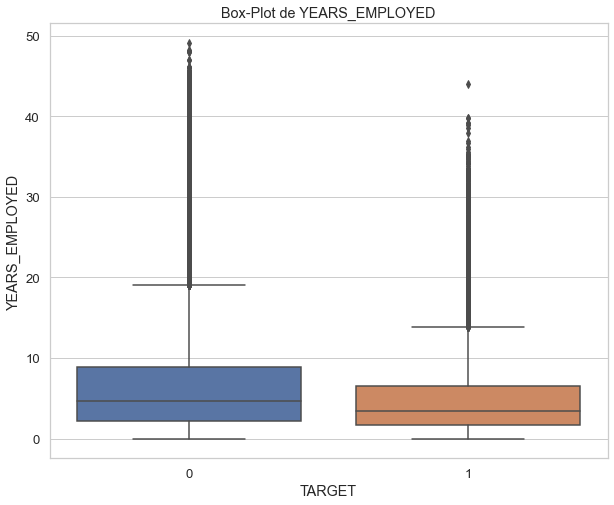

In [82]:
application_train['YEARS_EMPLOYED'] = application_train.DAYS_EMPLOYED * -1 / 365
print_percentiles(application_train, 'DAYS_EMPLOYED')
plot_continuous_variables(application_train, 'YEARS_EMPLOYED', plots = ['box'], scale_limits = [0,70], figsize = (10,8))
_ = application_train.pop('YEARS_EMPLOYED')

##### Observations et Conclusions:

<ol><li>Nous voyons que la colonne DAYS_EMPLOYED contient des points de données erronés avec les valeurs 365243. Ceux-ci semblent être des valeurs erronées/non sensibles.</li>
     <li>À partir de la boîte à moustaches, nous observons que les défaillants semblent avoir moins d'années d'emploi que les non-défauts. Tous les 25e, 50e et 75e quantiles pour les défaillants sont inférieurs à ceux des non-défauts.

<b>DAYS_ID_PUBLISH</b><br>

Cette colonne indique combien de jours après le jour de l'enregistrement le client a changé sa pièce d'identité avec laquelle il a demandé un prêt.

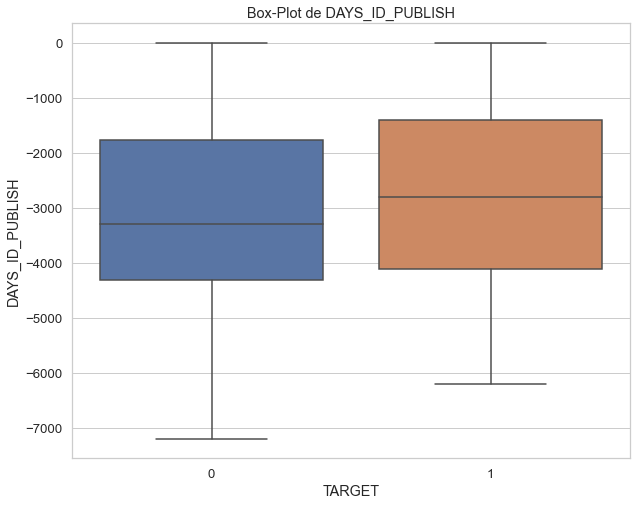

In [83]:
plot_continuous_variables(application_train, 'DAYS_ID_PUBLISH', plots = ['box'], figsize = (10,8))

##### Observations et Conclusions:

À partir de la boîte à moustaches ci-dessus, nous voyons une tendance similaire à celle observée avec DAYS_REGISTRATION, dans laquelle les défaillants avaient généralement moins de jours depuis qu'ils ont changé d'identité. Les Non-Defaulters montrent avoir plus de nombre de jours pour tous les quantiles depuis qu'ils ont changé leur pièce d'identité.

<b><u>Distribution de EXT_SOURCES</u></b>

Il y a trois colonnes EXT_SOURCES, qui contiennent des valeurs entre 0 et 1. Ce sont des scores normalisés de différentes sources.

----------------------------------------------------------------------------------------------------


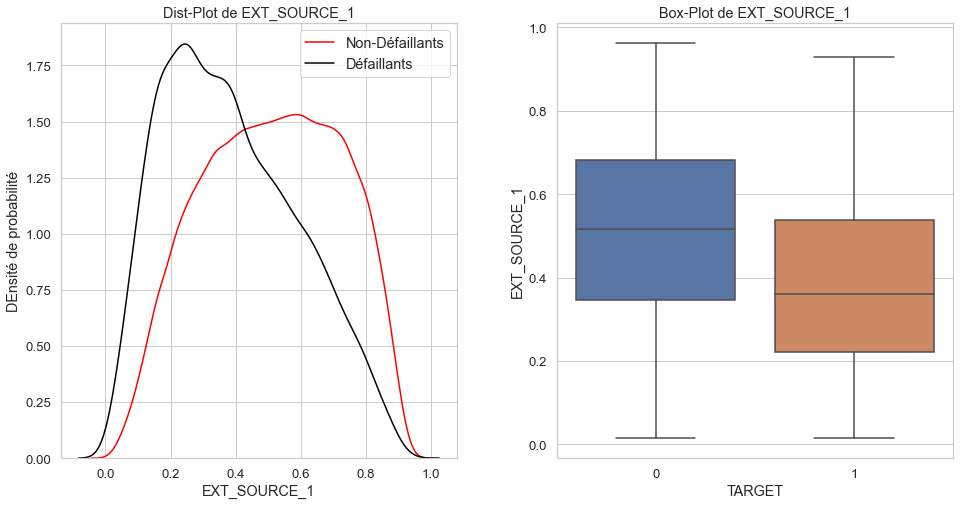

----------------------------------------------------------------------------------------------------


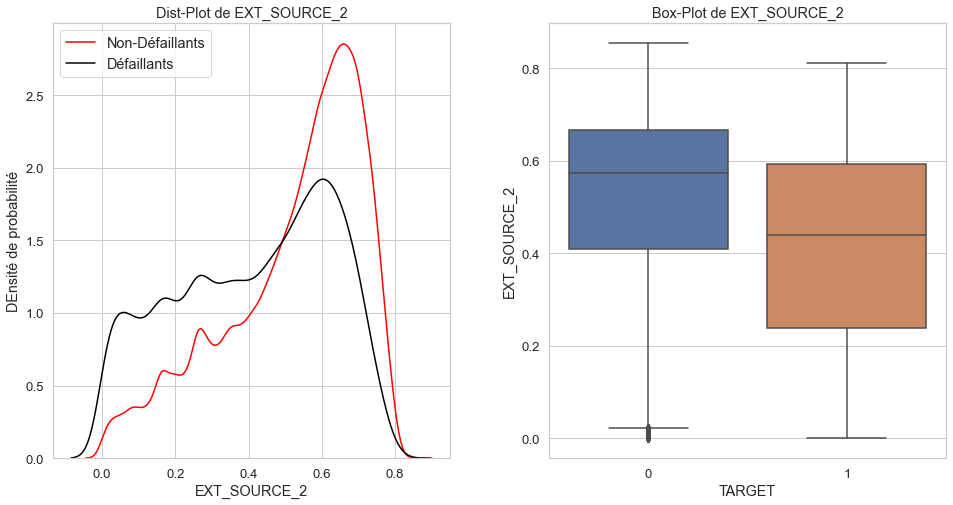

----------------------------------------------------------------------------------------------------


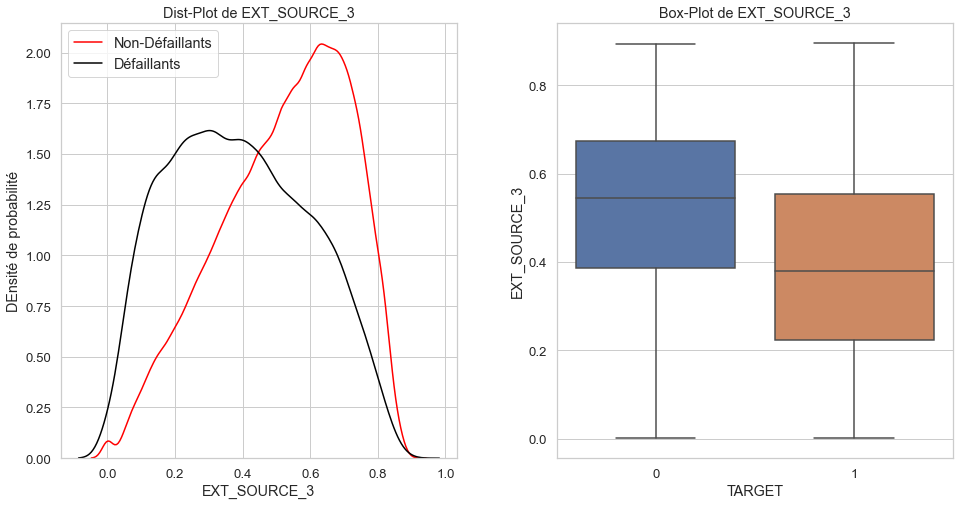

----------------------------------------------------------------------------------------------------


In [84]:
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_1', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_2', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_3', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)

##### Observations et Conclusions:

Des trois graphiques ci-dessus, nous pouvons tirer les conclusions suivantes :
<ol><li>Si nous regardons les box-plots, nous pouvons clairement voir une tendance similaire pour les trois colonnes EXT_SOURCE, à savoir que les défaillants ont tendance à avoir des valeurs considérablement plus faibles.
     <li>Cette tendance peut également être observée avec les PDF. Les non-défaillants affichent un pic plus élevé aux valeurs EXT_SOURCE élevées, et les densités de probabilité sont très faibles pour les valeurs faibles. Cela implique que les non-défauts ont généralement des valeurs élevées de ces scores.
     <li>Il est intéressant de noter que la valeur médiane pour les défaillants est presque égale ou inférieure aux valeurs du 25e centile des non défaillants.</li>
     Les colonnes <li>EXT_SOURCE_1 et EXT_SOURCE_3 ont tendance à montrer une meilleure discrimination/séparabilité par rapport à EXT_SOURCE_2.
     <li>Ces 3 features semblent être la meilleure séparation linéaire entre les défauts et les non-défaillants parmi toutes les features jusqu'à présent.

<b><u>Distribution de FLOORSMAX_AVG et FLOORSMIN_MODE</u></b>

Ces colonnes décrivent les scores normalisés de la moyenne du nombre maximum d'étages et du mode du nombre minimum d'étages dans le bâtiment du demandeur.

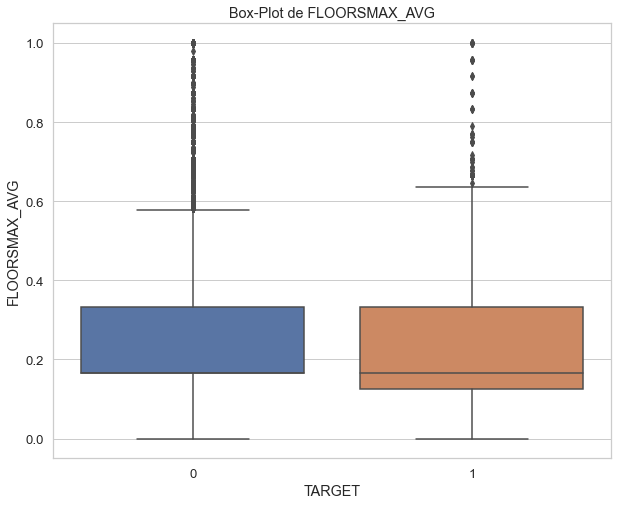

In [85]:
plot_continuous_variables(application_train, 'FLOORSMAX_AVG', plots = ['box'], figsize = (10,8))

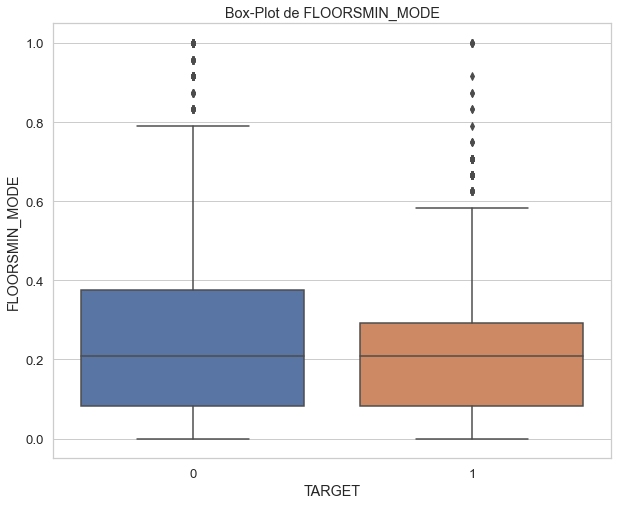

In [86]:
plot_continuous_variables(application_train, 'FLOORSMIN_MODE', plots = ['box'], figsize = (10,8))

##### Observations et Conclusions

À partir du graphique ci-dessus, nous pouvons tirer les enseignements suivants :
<ol><li>Les défaillants ont une valeur médiane inférieure de la fonction FLOORSMAX_AVG par rapport aux non défaillants. Les valeurs du 75e centile des défaillants et des non défaillants sont plus ou moins les mêmes, mais la valeur du 25 e centile des non défaillants est presque supérieure à la médiane des défaillants. Cela pourrait donc être une caractéristique importante.</li>
     <li>Les non-défauts ont également tendance à afficher une valeur plus élevée de FLLORSMIN_MODE par rapport aux défaillants. La valeur du 75e centile des non-défauts est nettement plus élevée que la valeur du 75e centile des défaillants.

### [4.2 bureau.csv](#plan)<a class="anchor" id="4.2"></a>

##### Description

Cette Table comprend tous les dossiers de crédit antérieurs du client auprès d'institutions financières autres que le groupe "Prêt à dépenser"  qui ont été déclarés par le Credit Bureau.

#### Basic Stats

In [89]:
print(f'Format de bureau.csv : {bureau.shape}')
print('-'*100)
print(f"Nombre d'unique SK_ID_BUREAU dans bureau.csv : {len(bureau.SK_ID_BUREAU.unique())}")
print(f"Nombre d'unique SK_ID_CURR dans bureau.csv : {len(bureau.SK_ID_CURR.unique())}")
print(f'Nombre de SK_ID_CURR communs dans application_train.csv et bureau.csv : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(bureau.SK_ID_CURR.unique())))}')
print(f'Nombre de SK_ID_CURR communs dans application_test.csv et bureau.csv : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(bureau.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans bureau: {bureau.shape[0] - bureau.duplicated().shape[0]}')
print('-'*100)
display(bureau.head(5))

Format de bureau.csv : (1716428, 17)
----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_BUREAU dans bureau.csv : 1716428
Nombre d'unique SK_ID_CURR dans bureau.csv : 305811
Nombre de SK_ID_CURR communs dans application_train.csv et bureau.csv : 263491
Nombre de SK_ID_CURR communs dans application_test.csv et bureau.csv : 42320
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans bureau: 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<h5>Observations et Conclusions:</h5>

<ol><li>Le fichier bureau.csv contient près de 1,7M de points de données, avec 17 features. Sur ces 17 features, deux sont SK_ID_CURR et SK_ID_BUREAU.
    <ul><li>SK_ID_BUREAU est l'identifiant du prêt précédent du client auprès d'autres institutions financières. Il peut y avoir plusieurs prêts antérieurs correspondant à un seul SK_ID_CURR qui dépend du modèle d'emprunt du client.
    <li>SK_ID_CURR est l'ID de prêt du prêt actuel du client avec Home Credit.
    <li>Le reste des fonctionnalités contient d'autres statistiques telles que DAYS_CREDIT, AMT_CREDIT_SUM, CREDIT_TYPE, etc.
    </ul></li>
    <li>Il y a environ 305 000 SK_ID_CURR uniques dans le bureau, dont :
        <ul><li>Il y a environ 263k SK_ID_CURR dans le bureau qui sont présents dans application_train sur un total de 307k de SK_ID_CURR unique d'application_train. Cela signifie que certains des demandeurs en cours de demande de prêt auprès de Home Credit Group n'ont aucun antécédent de crédit auprès du service du bureau de crédit.<br>
        <li>De même, il y a environ 42.3k SK_ID_CURR dans le bureau qui sont présents dans application_test, sur un total de 48k de SK_ID_CURR unique d'application_test.</ul>

#### Colonnes NaN et Pourcentages

In [96]:
print("-"*100)
print("Fusion TARGET avec bureau")
bureau_merged = application_train.iloc[:,:2].merge(bureau, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec bureau
----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol><li>Sur 17 features, il y a 7 features qui contiennent des valeurs NaN.
     <li>Les valeurs NaN les plus élevées sont observées avec la colonne AMT_ANNUITY qui a plus de 70 % de valeurs manquantes.</ol>

<b>Merging the TARGETS from application_train to bureau table.</b>

In [91]:
print("-"*100)
print("Fusion TARGET avec bureau")
bureau_merged = application_train.iloc[:,:2].merge(bureau, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec bureau
----------------------------------------------------------------------------------------------------


#### Phi-K Matrix

----------------------------------------------------------------------------------------------------


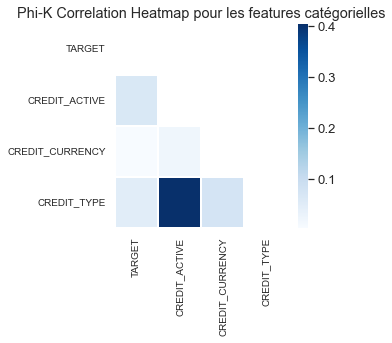

----------------------------------------------------------------------------------------------------
Les catégories avec les plus hautes valeurs du coef de corrélation Phi_k avec la cible (Target) sont:


,Nom de la colonne,Phik-Correlation
0,CREDIT_ACTIVE,0.064481
2,CREDIT_TYPE,0.049954
1,CREDIT_CURRENCY,0.004993


----------------------------------------------------------------------------------------------------


In [97]:
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
plot_phik_matrix(bureau_merged, cols_for_phik,  figsize = (5,5))

##### Observations et Conclusions:

La carte thermique (heatmap) ci-dessus montre les valeurs de corrélation Phi-K entre les valeurs catégorielles.
<ol>
<li>À partir du coefficient de corrélation Phi-K, nous voyons que la variable CREDIT_TYPE montre une certaine association avec la variable CREDIT_ACTIVE.</li>
<li>Nous constatons que les variables catégorielles n'ont pas vraiment d'association élevée avec la variable TARGET, en particulier la feature CREDIT_CURRENCY.</li>
     </ol>

#### Correlation Matrix of Features

----------------------------------------------------------------------------------------------------


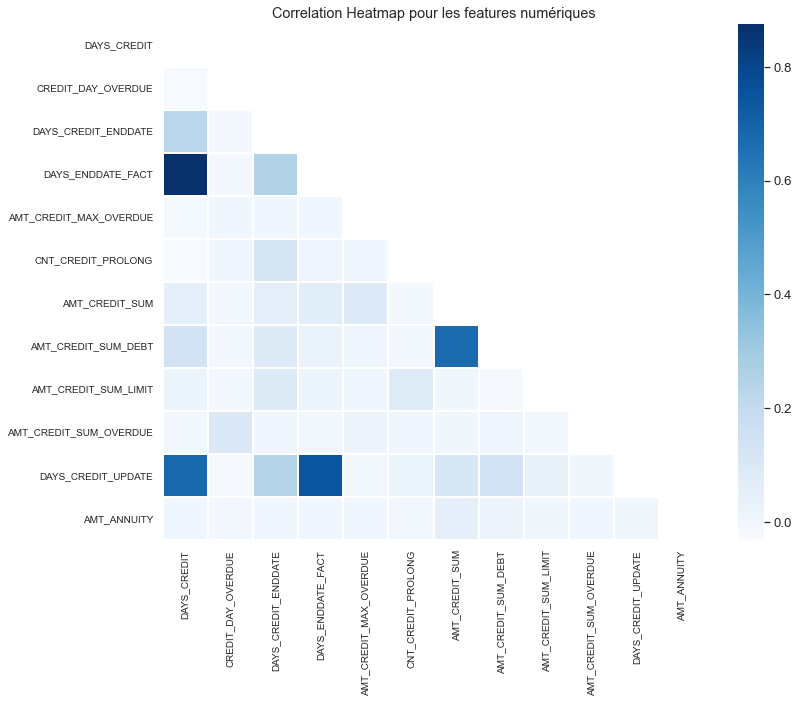

----------------------------------------------------------------------------------------------------


In [98]:
corr_mat = correlation_matrix(bureau_merged, ['SK_ID_CURR','SK_ID_BUREAU'], cmap = 'Blues', figsize = (12,10))
corr_mat.plot_correlation_matrix()

In [99]:
# Colonnes avec le coefficient de corrélation avec la cible Target le plus élevé dans la table bureau.
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec le coefficient de corrélation avec la cible Target le plus élevé dans la table bureau :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT']
interval columns not set, guessing: ['TARGET', 'CREDIT_DAY_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_ENDDATE']
interval columns not set, guessing: ['TARGET', 'DAYS_ENDDATE_FACT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_MAX_OVERDUE']
interval columns not set, guessing: ['TARGET', 'CNT_CREDIT_PROLONG']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_DEBT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_LIMIT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_UPDATE']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
----------------------------------------------------------------------------------------------------
Colonnes avec le coefficient de corrélation avec la cible Target le plus élevé

,Nom de la colonne,Phik-Correlation
0,DAYS_CREDIT,0.088651
2,DAYS_CREDIT_ENDDATE,0.018980
9,AMT_CREDIT_SUM_OVERDUE,0.005654
8,AMT_CREDIT_SUM_LIMIT,0.005192
4,AMT_CREDIT_MAX_OVERDUE,0.004280
5,CNT_CREDIT_PROLONG,0.003862
1,CREDIT_DAY_OVERDUE,0.002528
10,DAYS_CREDIT_UPDATE,0.002219
7,AMT_CREDIT_SUM_DEBT,0.001695
6,AMT_CREDIT_SUM,0.000670


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
     <li>La carte thermique (heatmap) ci-dessus montre la corrélation entre chaque feature du jeu de données du bureau avec le reste des features.</li>
     <li>On peut observer que la majeure partie de la carte thermique a des couleurs claires, ce qui montre peu ou pas de corrélation.</li>
     <li>Cependant, nous pouvons voir des nuances sombres qui représentent une corrélation élevée.</li>
     <li>La forte corrélation est particulièrement observée pour les features :
         <ol><li>DAYS_CREDIT et DAYS_CREDIT_UPDATE</li>
             <li>DAYS_ENDDATE_FACT et DAYS_CREDIT_UPDATE</li>
             <li>AMT_CREDIT_SUM et AMT_CREDIT_SUM_DEBT</li>
             <li>DAYS_ENDDATE_FACT et DAYS_CREDIT</li></ol></li>
     <li>Nous pouvons également voir que les features ne présentent pas une corrélation particulièrement bonne/élevée avec la cible en tant que telle, à l'exception de la feature DAYS_CREDIT. Cela implique qu'il n'y a pas de relation linéaire directe entre Target et les features.</li></ol>

#### Graphiques des variables catégorielles

Nous allons maintenant tracer certaines des variables catégorielles de la table bureau et voir leur impact sur la variable cible.

<b><u>Distribution de la feature catégorielle CREDIT_ACTIVE</u></b>

Cette colonne décrit le statut du prêt précédent signalé par le bureau de crédit.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'CREDIT_ACTIVE'sont:
['Closed' 'Active' nan 'Sold' 'Bad debt']
----------------------------------------------------------------------------------------------------
Effectifs de chaque modalité :
Closed      917733
Active      541919
Sold          5653
Bad debt        20
Name: CREDIT_ACTIVE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne CREDIT_ACTIVE = 5


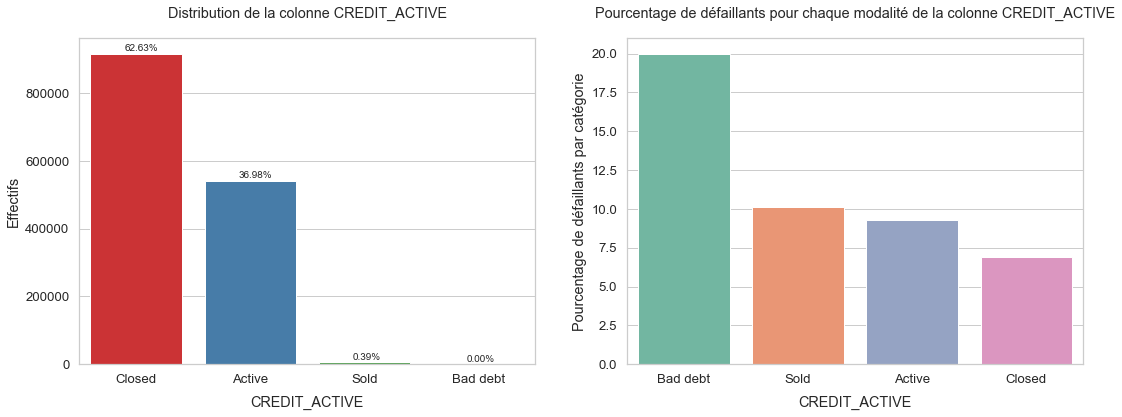

----------------------------------------------------------------------------------------------------


In [100]:
# Voyons les modalités uniques de 'CREDIT_ACTIVE'
print_unique_categories(bureau_merged, 'CREDIT_ACTIVE', show_counts = True)

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(bureau_merged, column_name = 'CREDIT_ACTIVE', horizontal_adjust = 0.3, fontsize_percent = 'x-small')
print('-'*100)

##### Observations et Conclusions:

À partir du graphique ci-dessus, nous pouvons tirer les enseignements suivants :
<ol><li>Nous voyons que la majorité des prêts précédents d'autres institutions financières sont des prêts fermés (62,63 %), suivis de 36,98 % des prêts actifs. Les prêts vendus et les créances irrécouvrables sont très moins nombreux.</li>
     <li>Si nous examinons le pourcentage de défaillants par modalité, nous constatons qu'environ 20 % des personnes de Bad-Debt ont fait défaut, ce qui est le taux de défaut le plus élevé. Viennent ensuite les prêts vendus et les prêts actifs. Le taux de défaut le plus bas concerne les prêts fermés, qui présentent un bon historique d'un client. Ainsi, le modèle observé ici est tout à fait logique et attendu.

#### Graphiques des variables continues

<u><b>Distribution des variables continues DAYS</b></u>

<b>DAYS_CREDIT</b>

Cette colonne décrit le nombre de jours avant la demande actuelle lorsque le client a demandé un crédit auprès du bureau de crédit. Pour faciliter l'interprétation, nous convertirons ces jours en années.

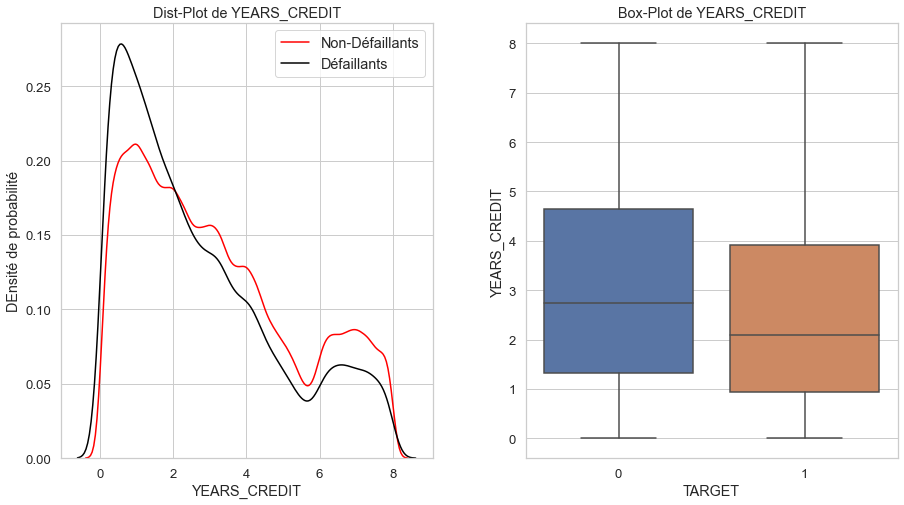

In [101]:
bureau_merged['YEARS_CREDIT'] = bureau_merged['DAYS_CREDIT'] / -365
plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots = ['distplot', 'box'], figsize = (15,8))
_ = bureau_merged.pop('YEARS_CREDIT')

##### Observations et Conclusions:

D'après les graphiques ci-dessus, nous voyons que :
<ol><li>À partir du PDF (Fonction de densité de probabilité), nous voyons que les défaillants ont tendance à avoir des pics plus élevés par rapport aux non-défaillants lorsque le nombre d'années est inférieur. tendance au défaut de paiement que ceux qui avaient postulé il y a longtemps. Le PDF des défaillants est également un peu vers la gauche par rapport aux non-défauts.</li>
     <li>D'après la boîte à moustaches également, nous voyons que les défaillants avaient généralement moins de YEARS_CREDIT par rapport aux non-défauteurs.

<b>DAYS_CREDIT_ENDDATE</b>

Cette colonne renseigne sur la durée restante du crédit Credit Bureau au moment de la demande de prêt en Crédit Immobilier.

----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_CREDIT_ENDDATE est -42060.0
Le 2ième percentile de la colonne DAYS_CREDIT_ENDDATE est -2487.0
Le 4ième percentile de la colonne DAYS_CREDIT_ENDDATE est -2334.0
Le 6ième percentile de la colonne DAYS_CREDIT_ENDDATE est -2202.0
Le 8ième percentile de la colonne DAYS_CREDIT_ENDDATE est -2073.9199999999983
Le 10ième percentile de la colonne DAYS_CREDIT_ENDDATE est -1939.0
Le 25ième percentile de la colonne DAYS_CREDIT_ENDDATE est -1144.0
Le 50ième percentile de la colonne DAYS_CREDIT_ENDDATE est -334.0
Le 75ième percentile de la colonne DAYS_CREDIT_ENDDATE est 473.0
Le 100ième percentile de la colonne DAYS_CREDIT_ENDDATE est 31199.0
----------------------------------------------------------------------------------------------------


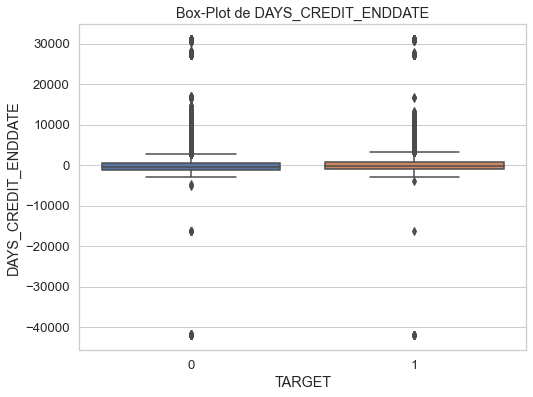

----------------------------------------------------------------------------------------------------


In [102]:
print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_ENDDATE', plots = ['box'], figsize = (8,6))
print('-'*100)

##### Observations et Conclusions:

À partir des valeurs de centile ci-dessus et en regardant la boîte à moustaches, nous voyons qu'il semble y avoir une valeur erronée pour DAYS_CREDIT_ENDDATE, où la valeur du 0e centile remonte à aussi longtemps que 42060 jours ou 115 ans. Cela n'a pas beaucoup de sens car cela implique que le prêt précédent du client remonte à 115 ans. Cela pourrait aussi être un prêt hérité, mais nous ne pouvons pas commenter si sûrement à ce sujet. Nous essaierons de supprimer ces valeurs lors de l'étape de prétraitement des données.

<b>DAYS_ENDDATE_FACT</b>

Cette colonne indique le nombre de jours il y a que le crédit du bureau de crédit avait pris fin au moment de la demande de prêt en crédit immobilier. Ces valeurs ne concernent que les crédits fermés.

----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_ENDDATE_FACT est -42023.0
Le 2ième percentile de la colonne DAYS_ENDDATE_FACT est -2561.0
Le 4ième percentile de la colonne DAYS_ENDDATE_FACT est -2450.0
Le 6ième percentile de la colonne DAYS_ENDDATE_FACT est -2351.0
Le 8ième percentile de la colonne DAYS_ENDDATE_FACT est -2265.0
Le 10ième percentile de la colonne DAYS_ENDDATE_FACT est -2173.0
Le 25ième percentile de la colonne DAYS_ENDDATE_FACT est -1503.0
Le 50ième percentile de la colonne DAYS_ENDDATE_FACT est -900.0
Le 75ième percentile de la colonne DAYS_ENDDATE_FACT est -427.0
Le 100ième percentile de la colonne DAYS_ENDDATE_FACT est 0.0
----------------------------------------------------------------------------------------------------


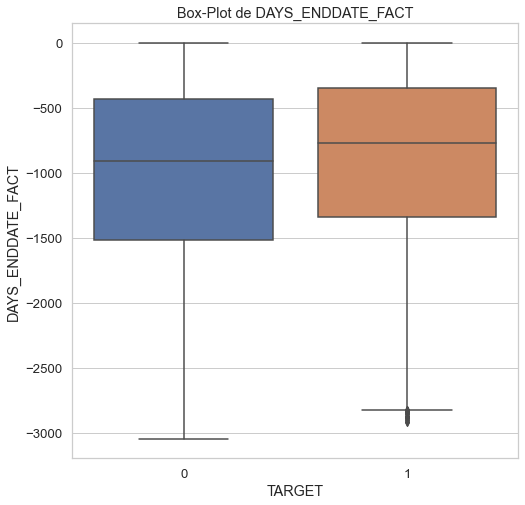

----------------------------------------------------------------------------------------------------


In [103]:
print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_ENDDATE_FACT', plots = ['box'], figsize = (8,8), scale_limits = [-40000, 0])
print('-'*100)

##### Observations et Conclusions:

<ol><li>Tout comme la colonne précédente, nous voyons que le 0e centile de cette colonne semble également erroné, soit 42023 jours ou ~115 ans. Nous devrions supprimer ces valeurs, car elles n'ont pas beaucoup de sens.</li>
     <li>En regardant le box-plot, nous voyons que les défaillants ont tendance à avoir moins de jours depuis la fin de leur crédit auprès du bureau de crédit. Les non-défauts ont généralement leurs crédits précédents terminés plus longtemps avant que les défaillants.

<b>DAYS_CREDIT_UPDATE</b></br>
Cette colonne raconte le nombre de jours il y a que l'information de crédit Bureau de crédit était venu au moment de la demande de prêt en crédit immobilier.

----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_CREDIT_UPDATE est -41947.0
Le 2ième percentile de la colonne DAYS_CREDIT_UPDATE est -2415.0
Le 4ième percentile de la colonne DAYS_CREDIT_UPDATE est -2213.0
Le 6ième percentile de la colonne DAYS_CREDIT_UPDATE est -2002.0
Le 8ième percentile de la colonne DAYS_CREDIT_UPDATE est -1766.0
Le 10ième percentile de la colonne DAYS_CREDIT_UPDATE est -1582.0
Le 25ième percentile de la colonne DAYS_CREDIT_UPDATE est -904.0
Le 50ième percentile de la colonne DAYS_CREDIT_UPDATE est -406.0
Le 75ième percentile de la colonne DAYS_CREDIT_UPDATE est -33.0
Le 100ième percentile de la colonne DAYS_CREDIT_UPDATE est 372.0
----------------------------------------------------------------------------------------------------


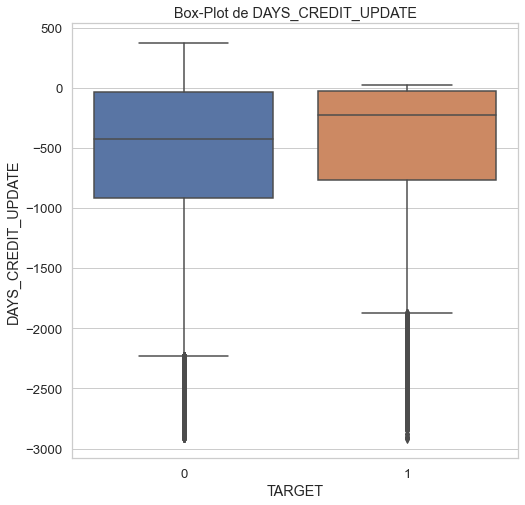

----------------------------------------------------------------------------------------------------


In [104]:
print_percentiles(bureau_merged, 'DAYS_CREDIT_UPDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_UPDATE', plots = ['box'], figsize = (8,8), scale_limits = [-40000, 400])
print('-'*100)

##### Observations et Conclusions:

<ol><li>La tendance des valeurs erronées est à nouveau très similaire à la colonne des autres jours où cette valeur du 0e centile semble être erronée. De plus, étant donné que seule la valeur du 0e centile est si étrange et que le reste semble aller bien, cette valeur est donc définitivement erronée. Nous supprimerons également cette valeur.
     <li>À partir de la boîte à moustaches, nous pouvons dire que les défaillants ont tendance à avoir un nombre de jours inférieur depuis que leurs informations sur le crédit du bureau de crédit ont été reçues. Leurs valeurs médianes au 75e centile sont toutes inférieures à celles des non-défauts.</ol>

### [4.3 bureau_balance.csv](#plan)<a class="anchor" id="4.3"></a>

##### Description

Cette table comprend le solde mensuel de chaque crédit pour chacun des crédits précédents que le client avait auprès d'institutions financières autres que "Prêt à dépenser".

<h4>Basic Stats</h4>

In [105]:
print(f'Format de bureau_balance.csv : {bureau_balance.shape}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans bureau_balance: {bureau_balance.shape[0] - bureau_balance.duplicated().shape[0]}')
print('-'*100)
display(bureau_balance.head(5))

Format de bureau_balance.csv : (27299925, 3)
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans bureau_balance: 0
----------------------------------------------------------------------------------------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [107]:
print("-"*100)
print(f"Nombre d'unique SK_ID_BUREAU dans bureau_balance.csv : {len(bureau_balance.SK_ID_BUREAU.unique())}")
print('-'*100)
print(f"Nombre de valeurs uniques pour STATUS : {len(bureau_balance.STATUS.unique())}")
print(f"Valeurs uniques pour STATUS :\n{bureau_balance.STATUS.unique()}")
print('-'*100)
print(f"Nombre maximal de mois pour Months Balance: {np.abs(bureau_balance.MONTHS_BALANCE.min())}")
print('-'*100)

----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_BUREAU dans bureau_balance.csv : 817395
----------------------------------------------------------------------------------------------------
Nombre de valeurs uniques pour STATUS : 8
Valeurs uniques pour STATUS :
['C' '0' 'X' '1' '2' '3' '5' '4']
----------------------------------------------------------------------------------------------------
Nombre maximal de mois pour Months Balance: 96
----------------------------------------------------------------------------------------------------


##### Observations et Conclusions

<ol><li>La table bureau_balance.csv contient environ 27,29 millions de lignes et 3 colonnes.</li>
     <li>Cette table contient le statut mensuel de chacun des prêts précédents pour un demandeur particulier signalé par le service de crédit.
     <li>Il y a 8 valeurs uniques pour le STATUS qui sont codées. Chacun d'eux a une signification particulière. <br>
         C signifie fermé, X signifie statut inconnu, 0 signifie pas de DPD, 1 signifie maximum fait pendant le mois entre 1-30, 2 signifie DPD 31-60,… 5 signifie DPD 120+ ou vendu ou radié.
      <li>Le solde du mois le plus ancien que nous ayons est le statut en arrière de 96 mois, c'est-à-dire que le statut a été fourni jusqu'à 8 ans d'historique pour les prêts pour lesquels ils existent.

<h4>NaN Columns and Percentages</h4>

In [108]:
plot_nan_percent(nan_df_create(bureau_balance), 'bureau_balance')

Le dataframe bureau_balance ne contient aucun NaN.


### [4.4 previous_application.csv](#plan)<a class="anchor" id="4.4"></a>

##### Description

Cette table contient les données statiques du prêt précédent que le client avait avec "Prêt à dépenser".

#### Basic Stats

In [110]:
print(f'Format de previous_application.csv : {previous_application.shape}')
print('-'*100)
print(f"Nombre d'unique SK_ID_PREV dans previous_application.csv : {len(previous_application.SK_ID_PREV.unique())}")
print(f"Nombre d'unique SK_ID_CURR dans previous_application.csv : {len(previous_application.SK_ID_CURR.unique())}")
print('-'*100)
print(f'Nombre de SK_ID_CURR communs dans application_train.csv et previous_application.csv : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(previous_application.SK_ID_CURR.unique())))}')
print(f'Nombre de SK_ID_CURR communs dans application_test.csv et previous_application.csv : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(previous_application.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans previous_application: {previous_application.shape[0] - previous_application.duplicated().shape[0]}')
print('-'*100)
display(previous_application.head(5))

Format de previous_application.csv : (1670214, 37)
----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_PREV dans previous_application.csv : 1670214
Nombre d'unique SK_ID_CURR dans previous_application.csv : 338857
----------------------------------------------------------------------------------------------------
Nombre de SK_ID_CURR communs dans application_train.csv et previous_application.csv : 291057
Nombre de SK_ID_CURR communs dans application_test.csv et previous_application.csv : 47800
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans previous_application: 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Observations et Conclusions:

<ol><li>La table previous_application.csv se compose de 1,67 million de lignes au total. Chaque ligne correspond à chacun des prêts précédents que le client avait contractés auparavant avec Home Credit Group. Il est possible pour un seul client de la demande actuelle d'avoir plusieurs prêts antérieurs avec Home Credit Group.</li>
     <li>Il y a 37 colonnes dans previous_application.csv, qui contiennent les détails du prêt précédent.</li>
     <li>Il y a 338 000 SK_ID_CURR uniques dans l'application précédente, dont 291 k correspondent aux SK_ID_CURR d'application_train et 47,8 k correspondent aux SK_ID_CURR d'application_test.</li></ol>

#### Colonnes et pourcentages NaN

----------------------------------------------------------------------------------------------------
Nombre de colonnes contenant des NaNs : 16 columns


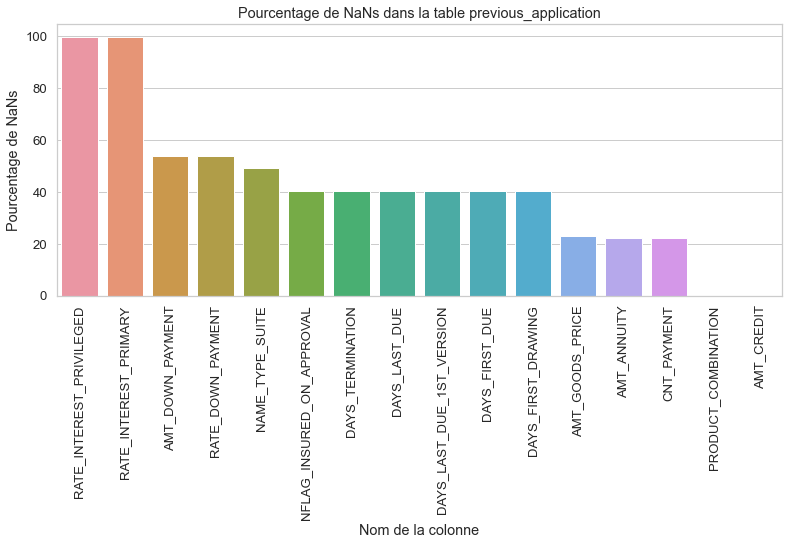

----------------------------------------------------------------------------------------------------


In [111]:
previous_application_nan = nan_df_create(previous_application)
print('-' * 100)
plot_nan_percent(previous_application_nan, 'previous_application', tight_layout = False, figsize = (13,5))
print('-' * 100)
del previous_application_nan

##### Observations et Conclusions

<ol><li>Il y a 16 colonnes sur les 37 colonnes qui contiennent des valeurs NaN.</li>
     <li>Deux de ces colonnes ont des valeurs manquantes à 99,64 %, ce qui est très élevé, et nous devrons trouver un moyen intelligent de gérer des valeurs NaN aussi élevées. Nous ne pouvons pas supprimer directement une fonctionnalité à ce stade.</li>
     <li>En dehors de ces deux colonnes, le reste des colonnes contient également > 40 % de valeurs NaN, à l'exception de 5 colonnes. </li></ol>

<b>Merging the TARGETS from application_train to previous_application table.</b>

In [112]:
print("-"*100)
print("Fusion TARGET avec previous_application Table")
prev_merged = application_train.iloc[:,:2].merge(previous_application, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec previous_application Table
----------------------------------------------------------------------------------------------------


#### Phi-K Matrix

----------------------------------------------------------------------------------------------------


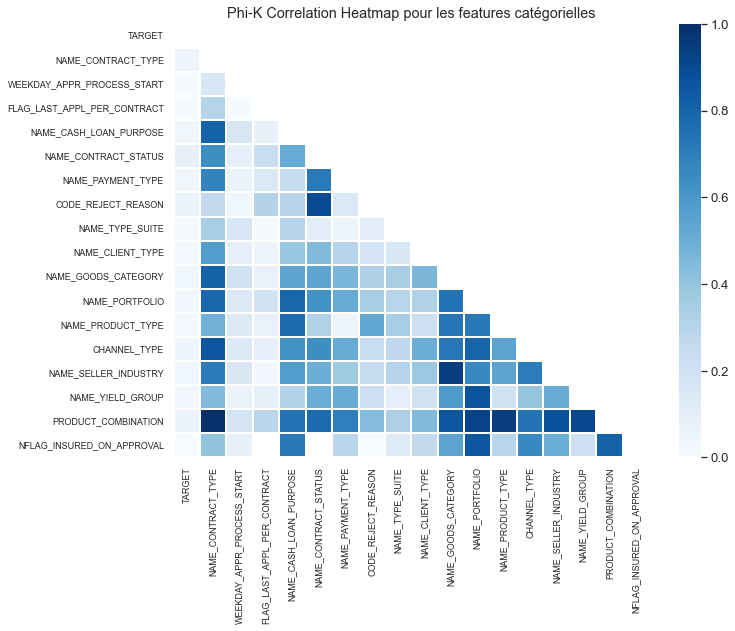

----------------------------------------------------------------------------------------------------
Les catégories avec les plus hautes valeurs du coef de corrélation Phi_k avec la cible (Target) sont:


,Nom de la colonne,Phik-Correlation
4,NAME_CONTRACT_STATUS,0.088266
15,PRODUCT_COMBINATION,0.063839
6,CODE_REJECT_REASON,0.062771
0,NAME_CONTRACT_TYPE,0.050859
12,CHANNEL_TYPE,0.050302
9,NAME_GOODS_CATEGORY,0.042951
3,NAME_CASH_LOAN_PURPOSE,0.040305
5,NAME_PAYMENT_TYPE,0.039752
13,NAME_SELLER_INDUSTRY,0.038077
14,NAME_YIELD_GROUP,0.034626


----------------------------------------------------------------------------------------------------


In [113]:
cols_for_phik = ['TARGET'] + prev_merged.dtypes[prev_merged.dtypes == 'object'].index.tolist() + ['NFLAG_INSURED_ON_APPROVAL']
plot_phik_matrix(prev_merged, cols_for_phik, cmap = 'Blues', figsize = (11,9), fontsize = 9)

##### Observations et Conclusions :

À partir de la carte thermique (heatmap) ci-dessus des valeurs du coefficient Phi-K pour les features catégorielles, nous observons que :

<ol><li>La feature PRODUCT_COMBINATION montre une association avec de nombreuses autres features telles que NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO, etc.</li>
     <li>La feature NAME_GOODS_CATEGORY est également fortement associée à NAME_SELLER_INDUSTRY</li>
     <li>Si nous examinons l'association avec la variable TARGET, nous constatons que les features NAME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON sont parmi les features les plus associées et nécessitent un examen plus approfondi</li></ol>

#### Correlation Matrix of Features

----------------------------------------------------------------------------------------------------


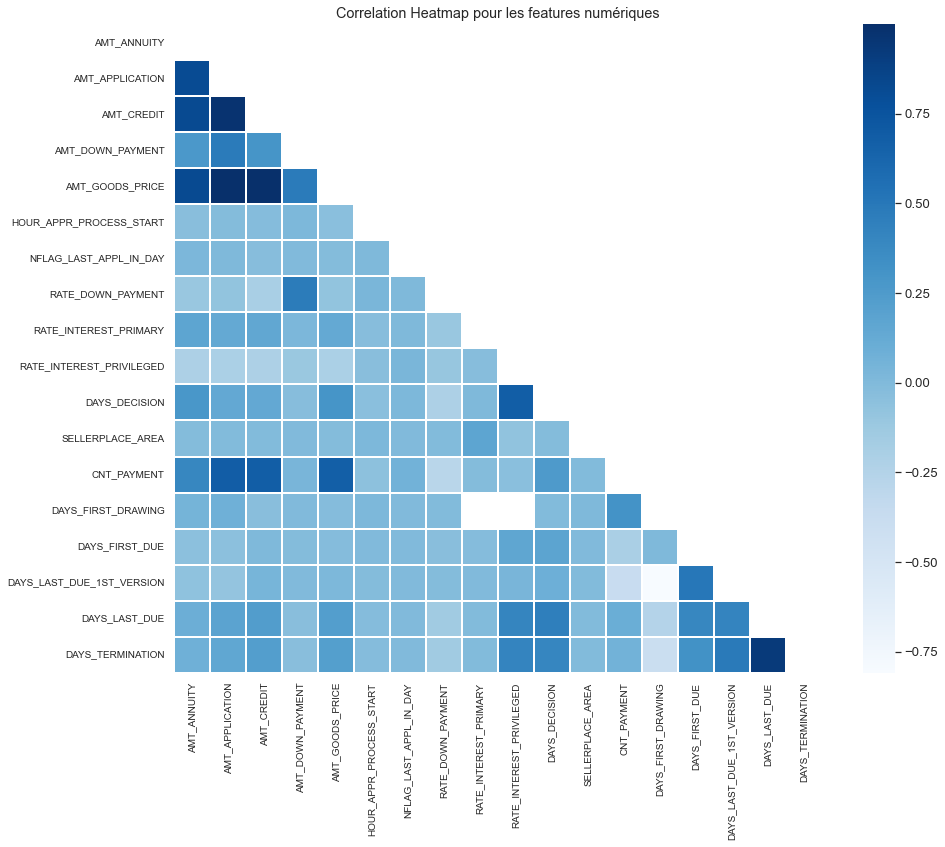

----------------------------------------------------------------------------------------------------


In [115]:
corr_mat = correlation_matrix(prev_merged, ['SK_ID_CURR','SK_ID_PREV','NFLAG_INSURED_ON_APPROVAL'], cmap = 'Blues', figsize = (14,12))
corr_mat.plot_correlation_matrix()

In [116]:
# Colonnes avec le coefficient phik-correlation avec la variable cible Target le plus élevé dans le jeu previous_applications
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec le coefficient phik-correlation avec la variable cible Target le plus élevé dans le jeu previous_applications :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_APPLICATION']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'NFLAG_LAST_APPL_IN_DAY']
interval columns not set, guessing: ['TARGET', 'RATE_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIMARY']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIVILEGED']
interval columns not set, guessing: ['TARGET', 'DAYS_DECISION']
interval columns not set, guessing: ['TARGET', 'SELLERPLACE_AREA']
interval columns not set, guessing: ['TARGET', 'CNT_PAYMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_FIRST_DRAWING']
interval columns not set, guessing: ['TARGET', 'DAYS_F

,Nom de la colonne,Phik-Correlation
12,CNT_PAYMENT,0.056639
10,DAYS_DECISION,0.053694
13,DAYS_FIRST_DRAWING,0.048993
7,RATE_DOWN_PAYMENT,0.039592
5,HOUR_APPR_PROCESS_START,0.038121
9,RATE_INTEREST_PRIVILEGED,0.028204
15,DAYS_LAST_DUE_1ST_VERSION,0.027878
16,DAYS_LAST_DUE,0.027320
17,DAYS_TERMINATION,0.026479
0,AMT_ANNUITY,0.013808


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
     <li>La carte thermique (heatmap) ci-dessus montre la corrélation entre chaque feature de la table previous_application avec le reste des features.</li>
     <li>À partir de la carte thermique, nous pouvons voir certaines features fortement corrélées qui ont une couleur plus foncée.</li>
     <li>La forte corrélation est particulièrement observée pour les features :
         <ol><li>DAYS_TERMINATION et DAYS_LAST_DUE</li>
             <li>AMT_CREDIT et AMT_APPLICATION</li>
             <li>AMT_APPLICATION et AMT_GOODS_PRICE</li>
             <li>AMT_CREDIT et AMT_ANNUITY</li>
             <li>AMT_ANNUITY et AMT_CREDIT</li>
             <li>AMT_CREDIT et AMT_GOODS_PRICE</li></ol></li>
     <li>Nous pouvons également voir que les features ne présentent pas une corrélation particulièrement bonne/élevée avec Target en tant que tel. Cela implique qu'il n'y a pas beaucoup de relation linéaire directe entre Target et les features.</li></ol>

#### Graphiques des variables catégorielles

Traçons maintenant certaines des variables catégorielles de la table previous_application et voyons leur impact sur la variable cible.

<b><u>Distribution de Categorical Variable NAME_CONTRACT_TYPE</u></b>

Cette colonne décrit le type de Contrat du précédent prêt avec le Groupe Crédit Maison.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'NAME_CONTRACT_TYPE'sont:
['Consumer loans' 'Cash loans' 'Revolving loans' nan 'XNA']
----------------------------------------------------------------------------------------------------
Effectifs de chaque modalité :
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne NAME_CONTRACT_TYPE = 5


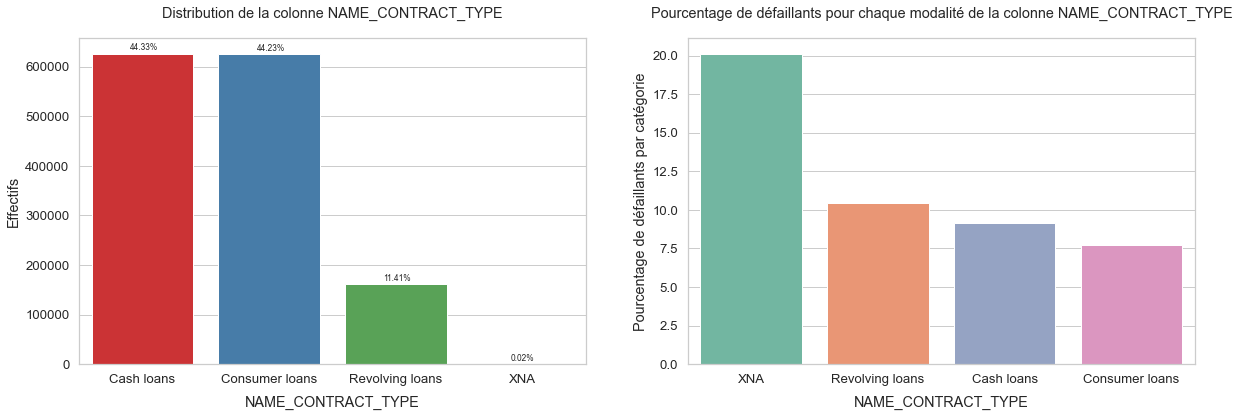

----------------------------------------------------------------------------------------------------


In [117]:
# Voyons les modalités uniques de 'NAME_CONTRACT_TYPE'
print_unique_categories(prev_merged, 'NAME_CONTRACT_TYPE', show_counts = True)

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'NAME_CONTRACT_TYPE', horizontal_adjust = 0.3, figsize = (20, 6))
print('-'*100)

##### Observations et Conclusions:

A partir des graphiques ci-dessus, nous pouvons observer ce qui suit :
<ol><li>Nous voyons que la plupart des prêts précédents étaient soit des prêts de trésorerie, soit des prêts à la consommation, ce qui correspond à environ 44 % des prêts chacun. Les 11,41 % restants correspondent à des prêts renouvelables, et il existe des prêts nommés XNA dont les types ne sont en réalité pas connus, mais ils sont très peu nombreux.</li>
     <li>Nous voyons que le pourcentage de défaillants pour le type de prêt XNA est le plus élevé, avec un taux de défaut de 20 %. Le deuxième taux de défaut le plus élevé se situe parmi les prêts renouvelables, qui est proche de 10,5 %.</li>
     <li>Les prêts de trésorerie ont des taux de défaut moins élevés, environ 9 %, tandis que les prêts à la consommation ont tendance à avoir le pourcentage de défauts de paiement le plus faible, qui est proche de 7,5 %.</li></ol>

<b><u>Distribution de la variable catégorielle NAME_CONTRACT_STATUS</u></b>

Cette colonne décrit l'état du contrat du précédent crédit avec 'Prêt à dépenser', c'est-à-dire s'il est actif ou clôturé, etc.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'NAME_CONTRACT_STATUS'sont:
['Approved' 'Canceled' 'Refused' nan 'Unused offer']
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne NAME_CONTRACT_STATUS = 5


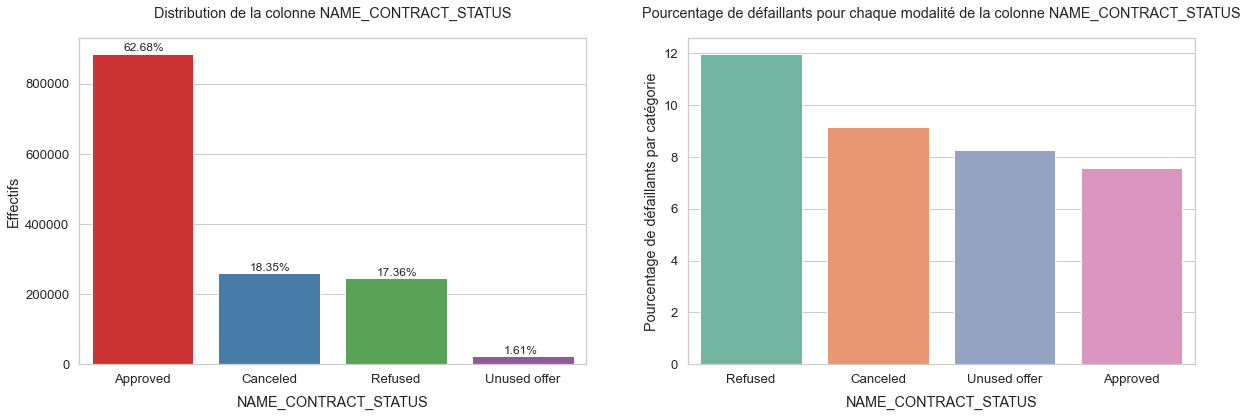

----------------------------------------------------------------------------------------------------


In [118]:
# Voyons les modalités uniques de 'NAME_CONTRACT_STATUS'
print_unique_categories(prev_merged, 'NAME_CONTRACT_STATUS')

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'NAME_CONTRACT_STATUS', horizontal_adjust = 0.25, figsize = (20, 6), fontsize_percent = 'small')
print('-'*100)

##### Observations et Conclusions:

D'après les graphiques ci-dessus, nous voyons que :
<ol><li>Le type de statut de contrat le plus courant est le statut approuvé. Environ 63% des crédits précédents ont un statut approuvé. Les deux prochains statuts communs sont Annulé et Refusé, qui correspondent tous deux à environ 18 % des prêts. Cela implique que la plupart des prêts sont approuvés et que seule une partie d'entre eux ne le sont pas. Le type de statut de contrat le moins présent est l'offre non utilisée, qui correspond à seulement 1,61 % de tous les prêts.</li>
    <li>En regardant la deuxième sous-parcelle pour le pourcentage de défaillants, nous voyons que les prêts qui avaient précédemment le statut Refusé ont tendance à être en défaut le plus élevé parmi les prêts actuels. Ils correspondent à environ 12 % des défaillants de cette catégorie. Ceux-ci sont suivis du Statut Annulé qui correspond à près de 9 % du Taux de Défaut. Ce comportement est assez logiquement attendu, car ces personnes ont dû être refusées faute de profil adéquat. Le taux de défaut le moins élevé est observé pour le statut de contrat approuvé.</li></ol>

<b><u>Distribution de Categorical Variable CODE_REJECT_REASON</u></b>

Cette colonne décrit la raison du rejet du prêt précédemment appliqué dans le groupe "Prêt à dépenser".

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'CODE_REJECT_REASON'sont:
['XAP' 'LIMIT' nan 'HC' 'SCO' 'SCOFR' 'VERIF' 'CLIENT' 'XNA' 'SYSTEM']
----------------------------------------------------------------------------------------------------
Effectifs de chaque modalité :
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne CODE_REJECT_REASON = 10


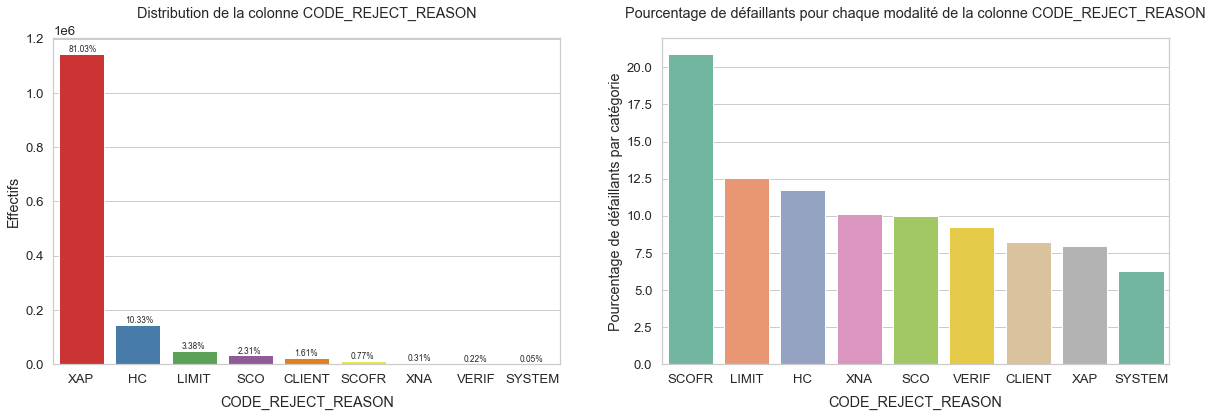

----------------------------------------------------------------------------------------------------


In [119]:
# Voyons les modalités uniques de 'CODE_REJECT_REASON'
print_unique_categories(prev_merged, 'CODE_REJECT_REASON', show_counts = True)

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'CODE_REJECT_REASON', horizontal_adjust = 0.18, figsize = (20, 6))
print('-'*100)

##### Observations et Conclusions:

Le graphique ci-dessus montre la distribution de la variable catégorielle CODE_REJECT_REASON. Les informations suivantes peuvent être générées à partir du graphique ci-dessus :
<ol><li>Le type de motif de rejet le plus courant est le XAP, qui représente environ 81 %. Les autres motifs ne constituent qu'une petite partie des motifs de rejet. HC est le deuxième motif de rejet le plus élevé avec seulement 10,33 % des occurrences.</li>
     <li>La répartition du pourcentage de défaillants pour chaque catégorie de CODE_REJECT_REASON est assez intéressante. Les candidats dont les demandes précédentes ont été rejetées par le code SCOFT ont le pourcentage le plus élevé de défaillants parmi eux (~21%). Viennent ensuite LIMIT et HC, qui comptent environ 12,5 % et 12 % de défaillants.</li>
     <li>La raison de rejet la plus courante XAP correspond à seulement 7,5 % de tous les défaillants et est le deuxième pourcentage le plus bas de défaillants après le code SYSTEM.</li></ol>

<b><u>Distribution de Categorical Variable CHANNEL_TYPE</u></b>

Cette colonne décrit le canal par lequel le client a été acquis pour le prêt précédent en crédit immobilier.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'CHANNEL_TYPE'sont:
['Stone' 'Credit and cash offices' 'Country-wide' 'Regional / Local'
 'AP+ (Cash loan)' 'Contact center' nan 'Channel of corporate sales'
 'Car dealer']
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne CHANNEL_TYPE = 9


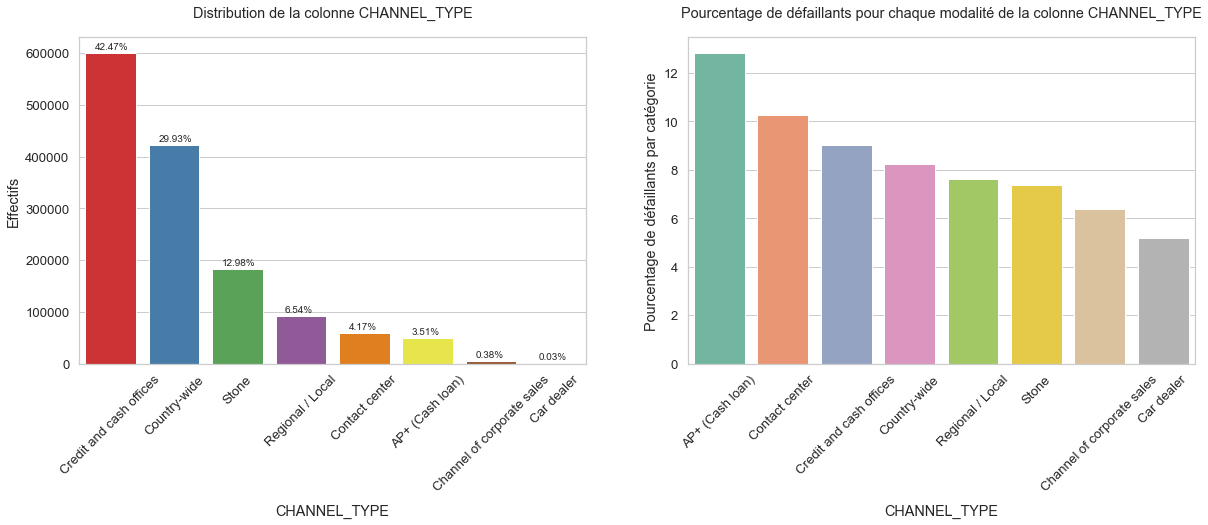

----------------------------------------------------------------------------------------------------


In [120]:
# Voyons les modalités uniques de 'CHANNEL_TYPE'
print_unique_categories(prev_merged, 'CHANNEL_TYPE')

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'CHANNEL_TYPE', horizontal_adjust = 0.15, rotation = 45, figsize = (20, 6), fontsize_percent = 'x-small')
print('-'*100)

##### Observations et Conclusions

Les deux graphiques ci-dessus montrent la distribution de CHANNEL_TYPE pour les prêts précédents en crédit immobilier.
<ol><li>Nous voyons que la plupart des applications ont été acquises via les bureaux de crédit et de caisse, ce qui représente environ 42,47% des applications, suivies par le canal national correspondant à 29,93% des applications. Le reste des types de canaux ne correspondait qu'à un certain nombre d'applications.</li>
     <li>Le pourcentage de défaut de paiement le plus élevé a été observé parmi les applications ayant un type de canal AP+ (prêt en espèces), ce qui correspond à environ 13 % de défauts de paiement dans cette catégorie. Les autres chaînes avaient des pourcentages par défaut inférieurs à celui-ci. Le concessionnaire automobile de la chaîne a affiché le plus faible pourcentage de défaillants dans cette modalité (seulement 5 %).

<b><u>Distribution de la variable catégorielle PRODUCT_COMBINATION</u></b>

Cette colonne donne des détails sur la combinaison de produits des applications précédentes.

----------------------------------------------------------------------------------------------------
Les modalités uniques de la colonne 'PRODUCT_COMBINATION'sont:
['POS other with interest' 'Cash X-Sell: low' 'POS industry with interest'
 'POS household with interest' 'POS mobile without interest' 'Card Street'
 'Card X-Sell' 'Cash X-Sell: high' 'Cash' 'Cash Street: high'
 'Cash X-Sell: middle' 'POS mobile with interest'
 'POS household without interest' 'POS industry without interest'
 'Cash Street: low' nan 'Cash Street: middle'
 'POS others without interest']
----------------------------------------------------------------------------------------------------
Nombre total de modalités da la colonne PRODUCT_COMBINATION = 18


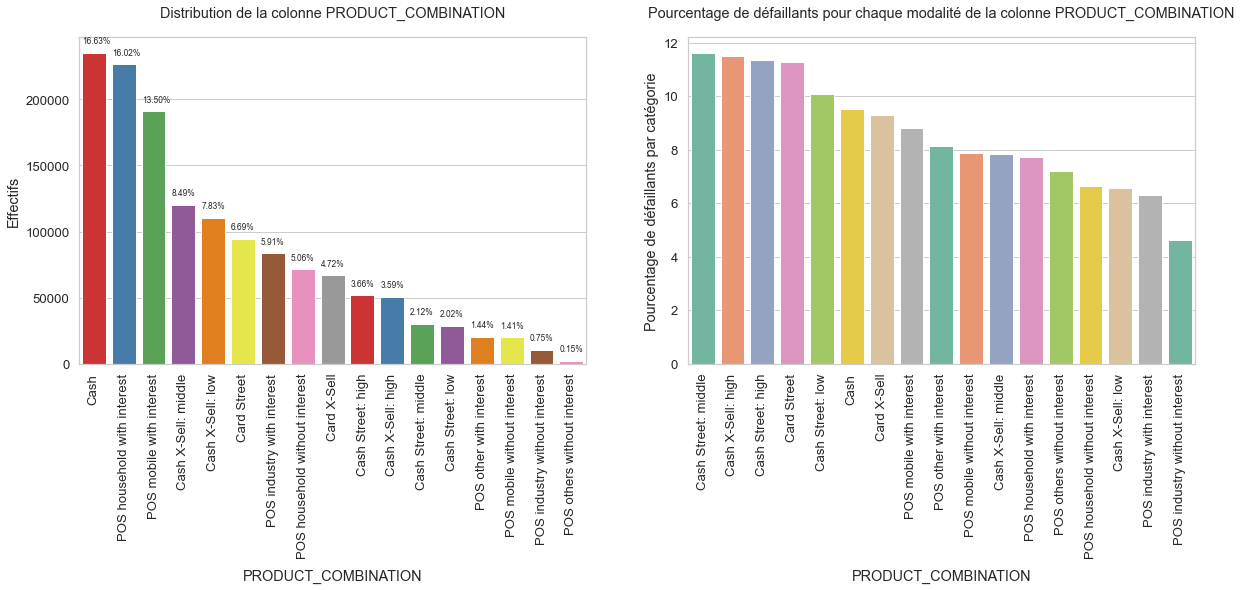

----------------------------------------------------------------------------------------------------


In [121]:
# Voyons les modalités uniques de 'PRODUCT_COMBINATION'
print_unique_categories(prev_merged, 'PRODUCT_COMBINATION')

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'PRODUCT_COMBINATION', rotation = 90, figsize = (20, 6))
print('-'*100)

##### Observations et Conclusions

À partir de la distribution de PRODUCT_COMBINATION, nous pouvons générer les informations suivantes :
<ol><li>Les 3 types de combinaison de produits les plus courants sont les espèces, les points de vente domestiques avec intérêt et les points de vente mobiles avec intérêts. Ils correspondent à environ 50 % de l'ensemble des candidatures. </li>
     <li>En examinant le graphique du pourcentage de défaillants par catégorie, nous constatons la tendance la plus élevée en matière de défaut de paiement parmi Cash Street : catégorie mobile, Cash X-sell : élevé, Cash Street : élevé et Card Street, qui sont tous proches d'environ 11 à 11,5 % de défauts de paiement. par catégorie. Le pourcentage le plus faible de défaillants se trouve dans la catégorie de l'industrie des points de vente sans intérêt, ce qui correspond à environ 4,5 % de défaillants.

#### Graphiques des variables continues

<u><b>Distribution des variables continues DAYS</b></u>

<b>DAYS_DECISION</b>

Cette colonne indique le nombre de jours relatifs à la demande en cours lorsque la décision a été prise concernant la demande précédente.

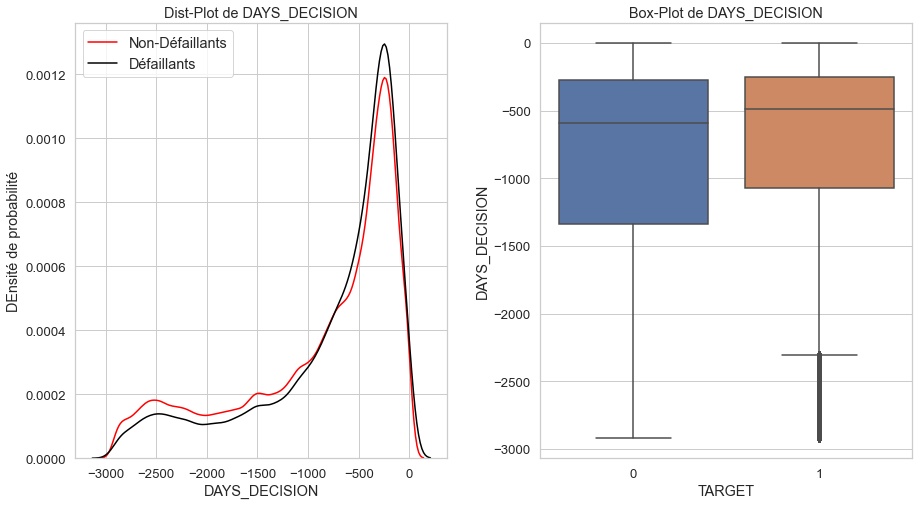

In [122]:
plot_continuous_variables(prev_merged, 'DAYS_DECISION', plots = ['distplot', 'box'], figsize = (15,8))

##### Observations et Conclusions

À partir du graphique ci-dessus, nous remarquons que pour les défaillants, le nombre de jours en arrière lorsque la décision a été prise est un peu inférieur à celui des non-défauts. Cela implique que les défaillants ont généralement eu la décision sur leurs demandes antérieures rendues plus récemment par rapport aux non-défaillants.

<b>DAYS_FIRST_DRAWING</b>

Cette colonne indique le nombre de jours depuis la demande en cours pendant lesquels le premier décaissement de la demande précédente a été effectué.

----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_FIRST_DRAWING est -2922.0
Le 1ième percentile de la colonne DAYS_FIRST_DRAWING est -2451.0
Le 2ième percentile de la colonne DAYS_FIRST_DRAWING est -1179.0
Le 3ième percentile de la colonne DAYS_FIRST_DRAWING est -674.0
Le 4ième percentile de la colonne DAYS_FIRST_DRAWING est -406.0
Le 5ième percentile de la colonne DAYS_FIRST_DRAWING est -262.0
Le 6ième percentile de la colonne DAYS_FIRST_DRAWING est -156.0
Le 7ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 8ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 9ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 10ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 20ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 40ième percentile de la colonne DAYS_FIRST_DRAWING est 365243.0
Le 60ième percentile de la colonne DAYS_FIRST_DRA

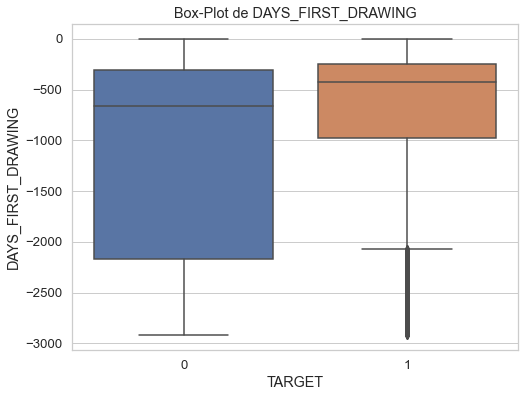

----------------------------------------------------------------------------------------------------


In [123]:
print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING', percentiles = list(range(0,11)) + list(range(20,101,20)))
plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING', plots = ['box'], figsize = (8,6), scale_limits = [-3000,0])
print('-'*100)

##### Observations et Conclusions:

<ol><li>En regardant les valeurs centiles de DAYS_FIRST_DRAWING, il semble que la plupart des valeurs soient erronées, à partir des valeurs du 7e centile lui-même. Ces valeurs erronées devront être dopées.</li>
     <li>Si nous essayons d'analyser la distribution de cette colonne en supprimant les points erronés, nous voyons que la plupart des défaillants ont eu leur premier tirage sur le crédit précédent plus récemment par rapport aux non-défauts. La valeur du 75e centile pour les défaillants est également nettement inférieure à celle des non-défauts.</li>

<b>DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, et DAYS_TERMINATION</b>

Ces colonnes décrivent également le nombre de jours depuis l'application actuelle pendant lesquels certaines activités se sont produites.

In [125]:
print('-'*100)
print("Percentiles pour DAYS_FIRST_DUE")
print_percentiles(prev_merged, 'DAYS_FIRST_DUE', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Percentiles pour DAYS_LAST_DUE_1ST_VERSION")
print_percentiles(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Percentiles pour DAYS_LAST_DUE")
print_percentiles(prev_merged, 'DAYS_LAST_DUE', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Percentiles pour DAYS_TERMINATION")
print_percentiles(prev_merged, 'DAYS_TERMINATION', percentiles = list(range(0,11,2)) + [20,40,60,80,100])

----------------------------------------------------------------------------------------------------
Percentiles pour DAYS_FIRST_DUE
----------------------------------------------------------------------------------------------------
Le 0ième percentile de la colonne DAYS_FIRST_DUE est -2892.0
Le 2ième percentile de la colonne DAYS_FIRST_DUE est -2759.0
Le 4ième percentile de la colonne DAYS_FIRST_DUE est -2648.0
Le 6ième percentile de la colonne DAYS_FIRST_DUE est -2555.0
Le 8ième percentile de la colonne DAYS_FIRST_DUE est -2471.0
Le 10ième percentile de la colonne DAYS_FIRST_DUE est -2388.0
Le 20ième percentile de la colonne DAYS_FIRST_DUE est -1882.0
Le 40ième percentile de la colonne DAYS_FIRST_DUE est -1070.0
Le 60ième percentile de la colonne DAYS_FIRST_DUE est -647.0
Le 80ième percentile de la colonne DAYS_FIRST_DUE est -329.0
Le 100ième percentile de la colonne DAYS_FIRST_DUE est 365243.0
-----------------------------------------------------------------------------------------

##### Observations et Conclusions

De toutes les valeurs centiles ci-dessus, nous nous rendons compte que toutes les colonnes Jours ont ces valeurs erronées quelque part ou l'autre. Ainsi, ces valeurs doivent être remplacées afin que notre modèle ne soit pas affecté par celles-ci.

### [4.5 installments_payments.csv](#plan)<a class="anchor" id="4.5"></a>

##### Description

Cette table répertorie l'historique de remboursement de chacun des prêts que le demandeur avait avec Home Credit Group. Le tableau contient des caractéristiques telles que le montant du versement, combien le client a-t-il payé pour chaque versement, etc.

<h4>Basic Stats</h4>

In [127]:
print(f'Format de installments_payments.csv : {installments_payments.shape}')
print('-'*100)
print(f"Nombre d'unique SK_ID_PREV dans installments_payments.csv : {len(installments_payments.SK_ID_PREV.unique())}")
print(f"Nombre d'unique SK_ID_CURR dans installments_payments.csv : {len(installments_payments.SK_ID_CURR.unique())}")
print('-'*100)
print(f'Nombre de SK_ID_CURR communs dans application_train.csv et installments_payments.csv : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print(f'Nombre de  SK_ID_CURR communs dans application_test.csv et installments_payments.csv : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans installments_payments: {installments_payments.shape[0] - installments_payments.duplicated().shape[0]}')
print('-'*100)
display(installments_payments.head(5))

Format de installments_payments.csv : (13605401, 8)
----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_PREV dans installments_payments.csv : 997752
Nombre d'unique SK_ID_CURR dans installments_payments.csv : 339587
----------------------------------------------------------------------------------------------------
Nombre de SK_ID_CURR communs dans application_train.csv et installments_payments.csv : 291643
Nombre de  SK_ID_CURR communs dans application_test.csv et installments_payments.csv : 47944
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans installments_payments: 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


##### Observations et Conclusions

<ol><li>Il y a environ 13,6 millions de points de données dans la table versements_payments.csv. Chaque ligne représente chaque historique de versements lié à un prêt particulier que le client avait précédemment avec Home Credit Group.</li>
     <li>Il y a 997 000 prêts précédents uniques dans les versements_versements. Ceux-ci appartiennent à 339 000 SK_ID_CURR uniques, qui sont l'identifiant des demandeurs de prêt en cours.</li>
     <li>Sur ces 339 k SK_ID_CURR, 291 k appartiennent à l'ensemble de données d'entraînement et 47,9 k appartiennent à l'ensemble de données de test. Cela implique que presque sur 307 000 SK_ID_CURR uniques dans application_train, 291 000 avaient auparavant une forme de prêt avec Home Credit. De même, pour 48,7 k des personnes dans l'ensemble de données de test, 47,9 k ont déjà eu un prêt avec Home Credit.</li>
     <li>Le tableau comporte 8 caractéristiques uniques, dont 6 décrivent les statistiques de chaque versement pour le prêt précédent. </li></ol>

#### Colonnes et pourcentages NaN

In [128]:
print('-'*100)
print("Colonnes avec des NaN et leurs pourcentages:")
installments_payments_nan = nan_df_create(installments_payments)
display(installments_payments_nan[installments_payments_nan.percent != 0])
print('-'*100)
del installments_payments_nan

----------------------------------------------------------------------------------------------------
Colonnes avec des NaN et leurs pourcentages:


,column,percent
5,DAYS_ENTRY_PAYMENT,0.021352
7,AMT_PAYMENT,0.021352


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions

<ol><li>Il n'y a que 2 colonnes qui contiennent les valeurs NaN des 8 colonnes de versements_payments.</li>
     <li>Ces colonnes contiennent également une proportion très minime de valeurs NaN, c'est-à-dire seulement 0,02 %, ce n'est donc pas très préoccupant.</li></ol>

<b>Fusion de la cible TARGETS depuis application_train vers installments_payments.</b>

In [129]:
print("-"*100)
print("Fusion TARGET avec installments_payments")
installments_merged = application_train.iloc[:,:2].merge(installments_payments, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec installments_payments
----------------------------------------------------------------------------------------------------


#### Correlation Matrix of Features

----------------------------------------------------------------------------------------------------


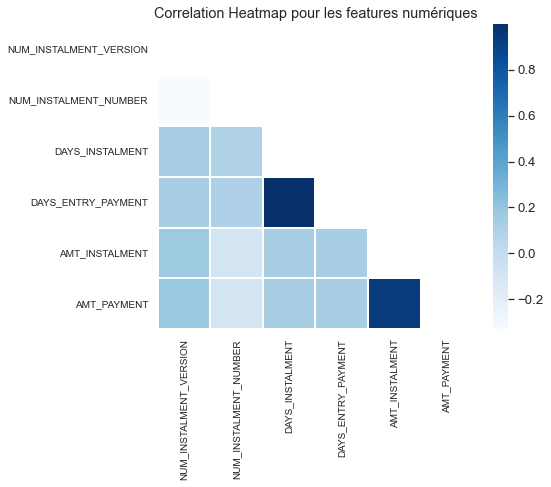

----------------------------------------------------------------------------------------------------


In [130]:
corr_mat = correlation_matrix(installments_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (8,7))
corr_mat.plot_correlation_matrix()

In [132]:
# Colonnes avec le coefficient phik-correlation avec la cible Target le plus élévé dans le jeu installments_payments 
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec le coefficient phik-correlation avec la cible Target le plus élévé dans le jeu installments_payments :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_VERSION']
interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_NUMBER']
interval columns not set, guessing: ['TARGET', 'DAYS_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_ENTRY_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT']
----------------------------------------------------------------------------------------------------
Colonnes avec le coefficient phik-correlation avec la cible Target le plus élévé dans le jeu installments_payments :


,Nom de la colonne,Phik-Correlation
2,DAYS_INSTALMENT,0.046824
3,DAYS_ENTRY_PAYMENT,0.033128
1,NUM_INSTALMENT_NUMBER,0.022993
4,AMT_INSTALMENT,0.004125
5,AMT_PAYMENT,0.003084
0,NUM_INSTALMENT_VERSION,0.002198


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
     <li>La carte thermique (heatmap) ci-dessus montre la corrélation entre chaque feature de la table versements_payments avec le reste des features.</li>
     <li>À partir de la carte thermique de la matrice de corrélation, nous voyons quelques features hautement corrélées. Ceux-ci sont:
         <ul><li>AMT_INSTALMENT et AMT_PAYMENT</li>
             <li>DAYS_INSTALMENT et DAYS_ENTRY_PAYMENT</li>
         </ul></li>
     <li>Ces deux ensembles de features corrélées sont compréhensibles, car il s'agit en fait des features relatives au moment où l'acompte devait être payé par rapport au moment où il a été payé, ainsi qu'au montant dû par rapport au montant qui a été payé.</li >
     <li>Ces fatures seront utiles pour créer de nouveaux ensembles de features complètement non corrélées.</li>
     <li>La corrélation des features avec la cible n'est pas perceptible, cela montre l'absence de relation linéaire entre la feature et la variable cible.</li></ol>

#### Graphiques des variables continues

Tout d'abord, nous allons regrouper par le champ 'SK_ID_PREV' et agréger avec la moyenne, de sorte que nous obtenions une ligne moyenne pour chacun des prêts précédents du client.

In [133]:
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue DAYS_INSTALMENT</u></b>

Cette colonne liste les jours où l'acompte du crédit précédent devait être payé.

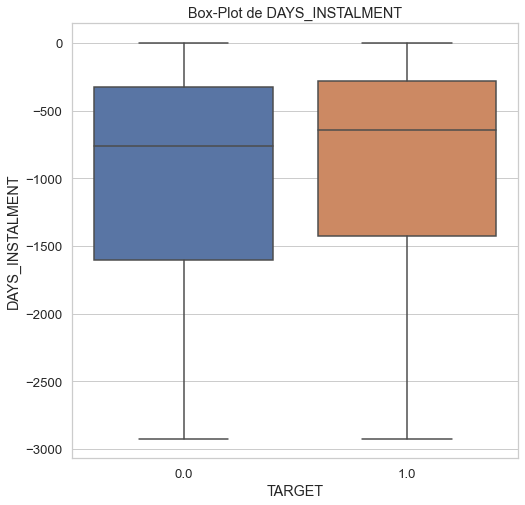

In [134]:
plot_continuous_variables(installments_merged, 'DAYS_INSTALMENT', plots = ['box'], figsize = (8,8))

<b><u>Distribution de la variable continue DAYS_ENTRY_PAYMENT</u></b>

Cette colonne liste les jours où l'acompte du précédent crédit a été effectivement payé.

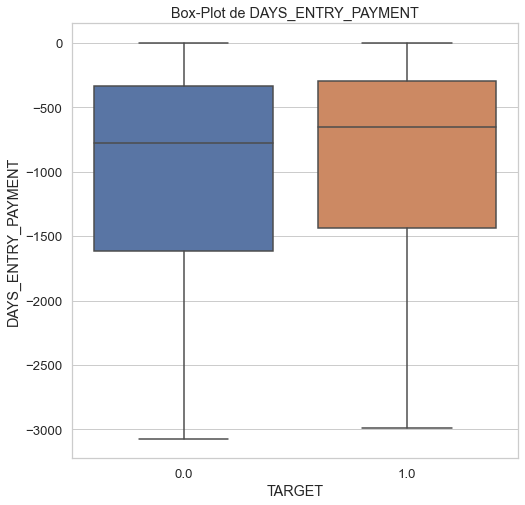

In [135]:
plot_continuous_variables(installments_merged, 'DAYS_ENTRY_PAYMENT', plots = ['box'], figsize = (8,8))
del installments_merged

##### Observations et Conclusions

À partir des deux graphiques ci-dessus, nous pouvons voir un schéma similaire, où les défaillants ont tendance à avoir moins de jours depuis leur dernier paiement, tandis que les non-défauts ont plus de jours depuis leurs derniers paiements. Tous les quantiles de défaillants ont des jours plus récents que ceux des non-défauts. Ainsi, les non-défauts ont généralement plus d'écart dans leurs paiements à partir du jour de la demande par rapport aux défaillants.

### [4.6 POS_CASH_balance.csv](#plan)<a class="anchor" id="4.6"></a>

##### Description

Cette table contient les instantanés du solde mensuel des précédents points de vente et des prêts en espèces que le demandeur avait avec Home Credit Group. Le tableau contient des colonnes comme le statut du contrat, le nombre de versements restants, etc.

#### Basic Stats

In [136]:
print(f'Format de POS_CASH_balance.csv : {POS_CASH_balance.shape}')
print('-'*100)
print(f"Nombre d'unique SK_ID_PREV dans POS_CASH_balance.csv : {len(POS_CASH_balance.SK_ID_PREV.unique())}")
print(f"Nombre d'unique SK_ID_CURR dans POS_CASH_balance.csv : {len(POS_CASH_balance.SK_ID_CURR.unique())}")
print('-'*100)
print(f'Nombre de SK_ID_CURR communs dans application_train.csv et POS_CASH_balance.csv : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')
print(f'Nombre de SK_ID_CURR communs dans application_test.csv et POS_CASH_balance.csv : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans POS_CASH_balance: {POS_CASH_balance.shape[0] - POS_CASH_balance.duplicated().shape[0]}')
print('-'*100)
display(POS_CASH_balance.head())

Format de POS_CASH_balance.csv : (10001358, 8)
----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_PREV dans POS_CASH_balance.csv : 936325
Nombre d'unique SK_ID_CURR dans POS_CASH_balance.csv : 337252
----------------------------------------------------------------------------------------------------
Nombre de SK_ID_CURR communs dans application_train.csv et POS_CASH_balance.csv : 289444
Nombre de SK_ID_CURR communs dans application_test.csv et POS_CASH_balance.csv : 47808
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans POS_CASH_balance: 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


##### Observations et Conclusions

<ol><li>Cette table contient environ 10 millions de points de données, où chaque ligne correspond à l'instantané mensuel de l'état du précédent POS et Cash Loan que le client avait avec Home Credit Group. Il se compose de 8 colonnes, dont deux sont SK_ID_CURR et SK_ID_PREV.</li>
     <li>La table contient 936 000 ID de prêts précédents uniques, ce qui correspond à 337 000 demandeurs actuels uniques (SK_ID_CURR).</li>
     <li>Sur ces 337 000 SK_ID_CURR, 289 000 appartiennent à l'ensemble d'entraînement et 47,8 000 appartiennent à l'ensemble de test.</li></ol>

#### Colonnes et pourcentages NaN

In [137]:
print('-'*100)
print("Colonnes avec des NaN et leurs pourcentages:")
POS_CASH_nan = nan_df_create(POS_CASH_balance)
display(POS_CASH_nan[POS_CASH_nan.percent != 0])
print('-'*100)
del POS_CASH_nan

----------------------------------------------------------------------------------------------------
Colonnes avec des NaN et leurs pourcentages:


,column,percent
4,CNT_INSTALMENT_FUTURE,0.260835
3,CNT_INSTALMENT,0.260675


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions

<ol><li>Il n'y a que 2 colonnes qui contiennent les valeurs NaN des 8 colonnes de POS_CASH_balance. Ces colonnes sont le nombre de versements restants et la durée du prêt.</li>
     <li>Ces colonnes contiennent également une proportion très minime de valeurs NaN, c'est-à-dire seulement 0,26 % %, ce n'est donc pas non plus très préoccupant.</li></ol>

<b>Fusion de la cible TARGET depuis application_train vers POS_CASH_balance .</b>

In [138]:
print("-"*100)
print("Fusion TARGET avec POS_CASH_balance")
pos_cash_merged = application_train.iloc[:,:2].merge(POS_CASH_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec POS_CASH_balance
----------------------------------------------------------------------------------------------------


#### Matrice de corrélation des features

----------------------------------------------------------------------------------------------------


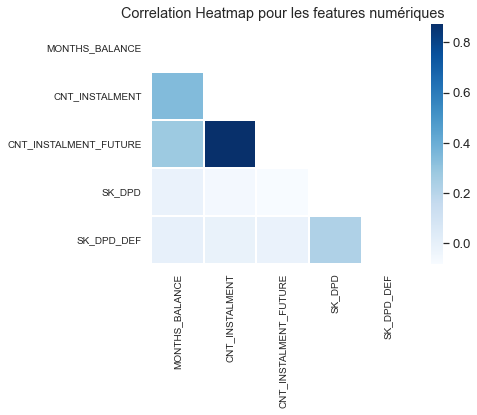

----------------------------------------------------------------------------------------------------


In [139]:
corr_mat = correlation_matrix(pos_cash_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (7,6))
corr_mat.plot_correlation_matrix()

In [140]:
# Colonnes avec le coefficient  phik-correlation avec la cible Target le plus élevé dans POS_CASH_balance 
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec le coefficient  phik-correlation avec la cible Target le plus élevé dans POS_CASH_balance :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT_FUTURE']
interval columns not set, guessing: ['TARGET', 'SK_DPD']
interval columns not set, guessing: ['TARGET', 'SK_DPD_DEF']
----------------------------------------------------------------------------------------------------
Colonnes avec le coefficient  phik-correlation avec la cible Target le plus élevé dans POS_CASH_balance :


,Nom de la colonne,Phik-Correlation
2,CNT_INSTALMENT_FUTURE,0.033194
1,CNT_INSTALMENT,0.030947
0,MONTHS_BALANCE,0.027391
3,SK_DPD,0.012773
4,SK_DPD_DEF,0.010539


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
     <li>La carte thermique (heatmap) ci-dessus montre la corrélation entre les features</li>
     <li>À partir de la carte thermique de la matrice de corrélation, nous avons un ensemble de features modérément corrélées, qui sont : CNT_INSTALMENT et CNT_INSTALMENT_FUTURE.</li>
     <li>La corrélation des features avec la cible est très faible, cela montre l'absence de relation linéaire entre la feature et la variable cible.</li></ol>

#### Graphiques de variables continues

Tout d'abord, nous allons regrouper par le champ 'SK_ID_PREV' et agréger avec la moyenne, de sorte que nous obtenions une ligne moyenne pour chacun des prêts précédents du client.

In [141]:
pos_cash_merged = pos_cash_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue CNT_INSTALMENT_FUTURE</u></b>

Cette colonne décrit le nombre d'acomptes restant à payer sur le crédit précédent.

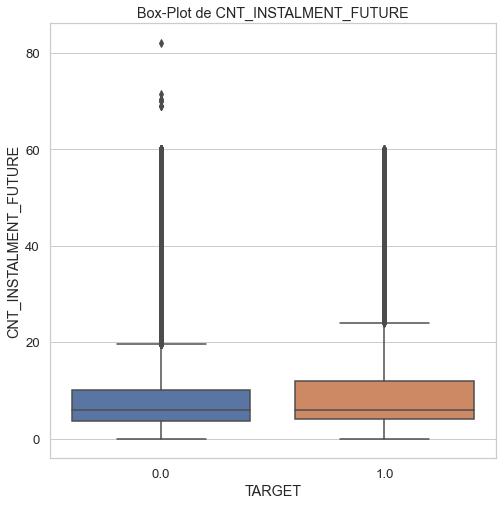

In [142]:
plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8,8))
del pos_cash_merged

##### Observations et Conclusions

En regardant la boîte à moustaches ci-dessus pour CNT_INSTALMENT_FUTURE, nous voyons que les valeurs centiles> 50 % pour les défaillants sont généralement plus élevées que celles des non-défauts. Même la moustache de limite supérieure pour les défaillants est plus élevée que celle des non-défauts. Cela suggère que les défaillants ont tendance à avoir plus de versements restants sur leurs crédits précédents par rapport aux non-défauts.

### [4.7 credit_card_balance.csv](#plan)<a class="anchor" id="4.7"></a>

##### Description

Cette table comprend les données mensuelles relatives à une ou plusieurs cartes de crédit que le demandeur avait avec le groupe de crédit à domicile. Le tableau contient des champs comme le solde, la limite de crédit, le montant des tirages, etc. pour chaque mois de la carte de crédit.

<h4>Basic Stats</h4>

In [143]:
print(f'Format de credit_card_balance.csv : {cc_balance.shape}')
print('-'*100)
print(f"Nombre d'unique SK_ID_PREV dans credit_card_balance.csv : {len(cc_balance.SK_ID_PREV.unique())}")
print(f"Nombre d'unique SK_ID_CURR dans credit_card_balance.csv : {len(cc_balance.SK_ID_CURR.unique())}")
print('-'*100)
print(f'Nombre de SK_ID_CURR communs dans application_train.csv et credit_card_balance.csv : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(cc_balance.SK_ID_CURR.unique())))}')
print(f'Nombre de SK_ID_CURR communs dans application_test.csv et credit_card_balance.csv : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(cc_balance.SK_ID_CURR.unique())))}')
print('-'*100)

print(f'Nombre de valeurs dupliquées dans credit_card_balance: {cc_balance.shape[0] - cc_balance.duplicated().shape[0]}')
print('-'*100)
display(cc_balance.head(5))

Format de credit_card_balance.csv : (3840312, 23)
----------------------------------------------------------------------------------------------------
Nombre d'unique SK_ID_PREV dans credit_card_balance.csv : 104307
Nombre d'unique SK_ID_CURR dans credit_card_balance.csv : 103558
----------------------------------------------------------------------------------------------------
Nombre de SK_ID_CURR communs dans application_train.csv et credit_card_balance.csv : 86905
Nombre de SK_ID_CURR communs dans application_test.csv et credit_card_balance.csv : 16653
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans credit_card_balance: 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


##### Observations et Conclusions

<ol><li>Il y a environ 3,84 millions de lignes dans la table credit_card_balance.csv, chacune correspondant au statut mensuel de la carte de crédit que le demandeur avait avec Home Credit Group. Ce tableau contient 23 fonctionnalités qui contiennent les statistiques sur le statut de la carte de crédit de chaque mois, telles que le montant du solde, le montant des tirages, le nombre de tirages, le statut, etc.</li>
     <li>Il existe 104,3 000 cartes de crédit uniques dont les détails figurent dans ce tableau.</li>
     <li>Sur ces 104,3 k, il y a 103,5 k SK_ID_CURR uniques. Cela signifie que la plupart des candidats n'avaient qu'une seule carte de crédit avec eux, et que peu d'entre eux en avaient plus d'une. Ces SK_ID_CURR sont l'ID des candidats qui ont actuellement demandé un prêt.</li>
     <li>Sur les 103 000 SK_ID_CURR uniques, 86,9 000 de ces candidats appartiennent à l'ensemble de formation et 16,6 000 appartiennent à l'ensemble d'applications de test.</li>
     <li>Sur les 307 000 demandeurs figurant dans le tableau application_train, seuls 86,9 000 d'entre eux avaient déjà une carte de crédit auprès du groupe "Prêt à dépenser".

#### Colonnes et pourcentages NaN

----------------------------------------------------------------------------------------------------
Nombre de colonnes contenant des NaNs : 9 columns


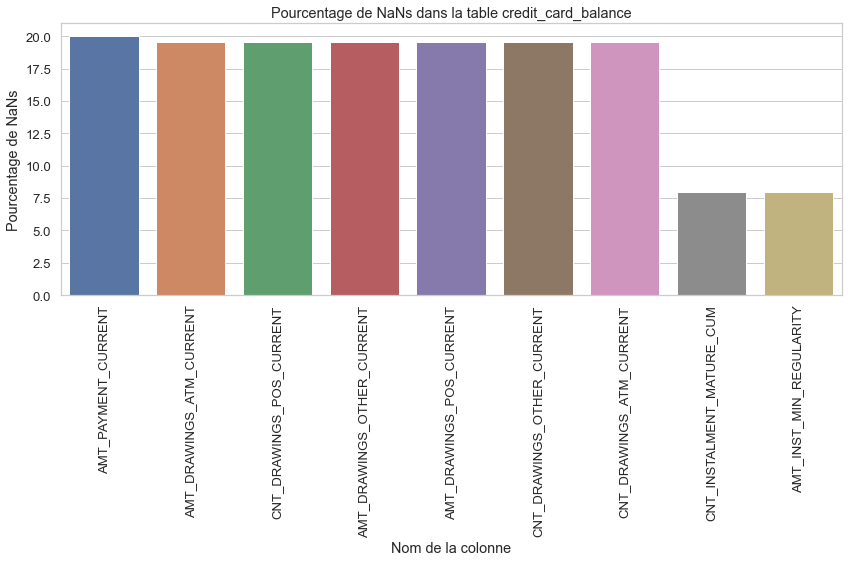

----------------------------------------------------------------------------------------------------


In [144]:
cc_balance_nan = nan_df_create(cc_balance)
print('-'*100)
plot_nan_percent(cc_balance_nan, 'credit_card_balance', tight_layout = False, rotation = 90, figsize = (14,5))
print('-'*100)
del cc_balance_nan

##### Observatiosn et Conclusions

<ol><li>Sur les 23 features, 9 de ces features contiennent des valeurs NaN.</li>
     <li>Si nous examinons les pourcentages de valeurs NaN, ils sont considérablement inférieurs au reste des tableaux que nous avons vus jusqu'à présent.</li>
     <li>7 de ces features ont des valeurs NaN proches de 20 %. Ces features sont principalement liées aux quantités de tirage et au nombre de tirages. Deux autres features sont liées aux statistiques des versements.</li></ol>

<b>Fusion de la cible TARGET depuis application_train vers credit_card_balance.</b>

In [145]:
print("-"*100)
print("Fusion TARGET avec credit_card_balance")
cc_balance_merged = application_train.iloc[:,:2].merge(cc_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion TARGET avec credit_card_balance
----------------------------------------------------------------------------------------------------


#### Matrice de corrélation des features

----------------------------------------------------------------------------------------------------


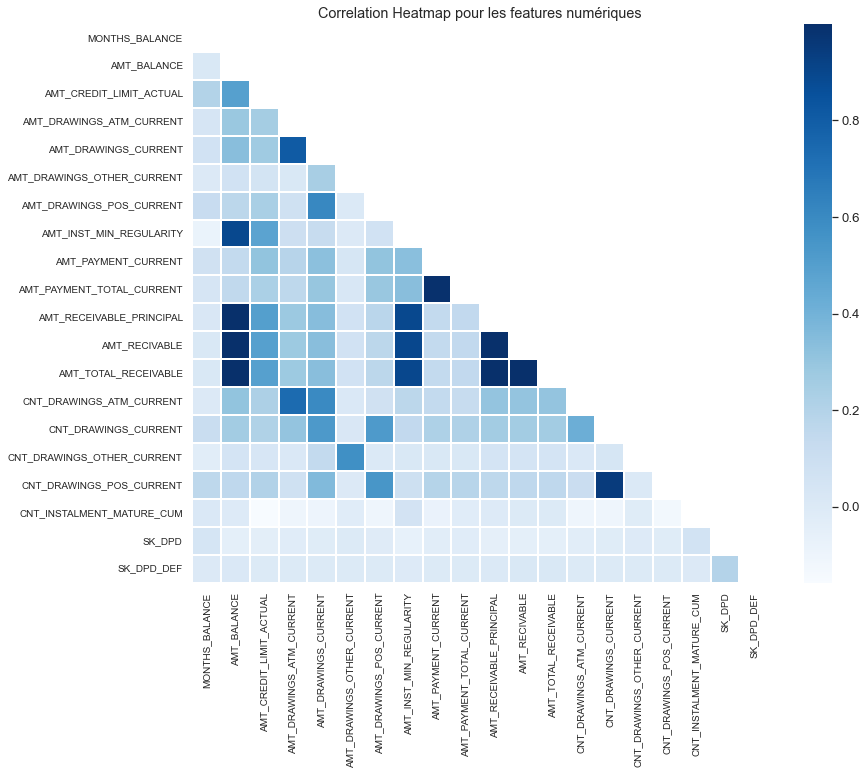

----------------------------------------------------------------------------------------------------


In [146]:
corr_mat = correlation_matrix(cc_balance_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (13,11))
corr_mat.plot_correlation_matrix()

In [147]:
# Colonnes avec le coefficient phik-correlation avec la cible Target le plus élevé dans credit_card_balance 
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec le coefficient phik-correlation avec la cible Target le plus élevé dans credit_card_balance :")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_LIMIT_ACTUAL']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_ATM_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_OTHER_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_POS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_INST_MIN_REGULARITY']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_TOTAL_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_RECEIVABLE_PRINCIPAL']
interval columns not set, guessing: ['TARGET', 'AMT_RECIVABLE']
interval columns not set, guessing: ['TARGET', 'AMT_TOTAL_RECEIVABLE']
interval columns not set, guessing: ['TARGET', 'CNT_DRAWINGS_ATM_CURREN

,Nom de la colonne,Phik-Correlation
1,AMT_BALANCE,0.059838
11,AMT_RECIVABLE,0.059311
12,AMT_TOTAL_RECEIVABLE,0.059287
10,AMT_RECEIVABLE_PRINCIPAL,0.058895
0,MONTHS_BALANCE,0.050360
7,AMT_INST_MIN_REGULARITY,0.042174
17,CNT_INSTALMENT_MATURE_CUM,0.038261
13,CNT_DRAWINGS_ATM_CURRENT,0.030052
2,AMT_CREDIT_LIMIT_ACTUAL,0.028752
14,CNT_DRAWINGS_CURRENT,0.027868


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
     <li>La carte thermique (heatmap) ci-dessus montre visuellement la corrélation entre les features du jeu credit_card_balance.</li>
     <li>À partir de la carte thermique de la matrice de corrélation, nous voyons quelques couples de features hautement corrélées. Ceux-ci sont:
         <ul><li>AMT_RECEIVABLE_PRINCIPLE, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE et AMT_BALANCE</li>
             <li>Nous observons également une forte corrélation entre ces 3 colonnes AMT_RECEIVABLE</li>
             <li>AMT_PAYMENT_TOTAL_CURRENT et AMT_PAYMENT_CURRENT</li>
         </ul></li>
     <li>Les ensembles de features corrélées 2e et 3e sont compréhensibles car ils ont plus ou moins la même histoire.</li>
     <li>La corrélation des features avec la cible n'est pas perceptible, cela montre l'absence de relation linéaire entre la feature et la variable cible.</li></ol>

#### Graphiques des variables continues

Tout d'abord, nous allons regrouper par le champ 'SK_ID_PREV' et agréger avec la moyenne, de sorte que nous obtenions une ligne moyenne pour chacun des prêts précédents du client.

In [148]:
cc_balance_merged = cc_balance_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue AMT_BALANCE</u></b>

Cette colonne fournissait le montant moyen du solde qu'une personne avait habituellement sur son compte de prêt de carte de crédit pour un prêt précédent.

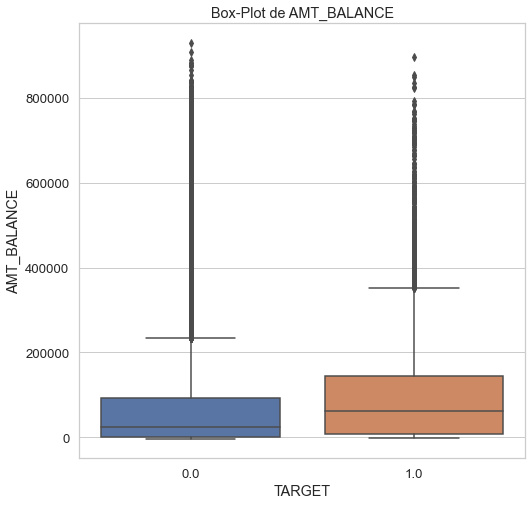

In [149]:
plot_continuous_variables(cc_balance_merged, 'AMT_BALANCE', plots = ['box'], figsize = (8,8))

##### Observations et Conclusions

D'après le graphique ci-dessus, on peut voir que les défaillants ont une valeur d'AMT_BALANCE plus élevée que les non défaillants. Ils montrent des valeurs plus élevées de tous les quantiles et même des moustaches. Cela pourrait impliquer que le montant du crédit pour les défaillants pourrait également être relativement plus élevé par rapport aux non-défaillants.

##### Observations et Conclusions:

Nous voyons que les défaillants ici aussi semblaient avoir un versement minimum plus élevé chaque mois par rapport aux non-défaillants. Cela concerne généralement des dépenses et des habitudes d'emprunt de la population. Les défaillants affichent des habitudes de dépenses et d'emprunt plus élevées que les non défaillants.

<b><u>Distribution de la variable continue AMT_TOTAL_RECEIVABLE</u></b>

Cette colonne décrit la moyenne du montant total à recevoir sur le crédit précédent.

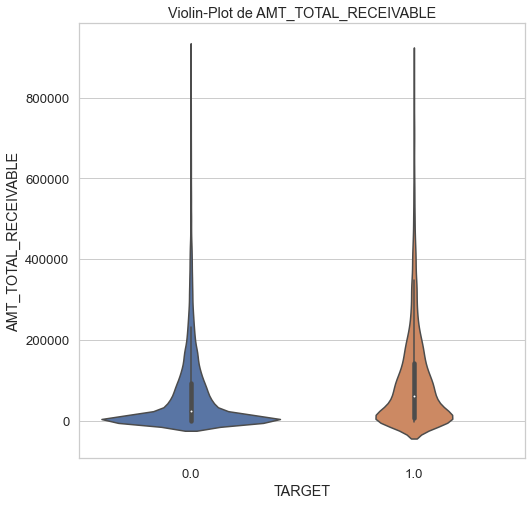

In [150]:
plot_continuous_variables(cc_balance_merged, 'AMT_TOTAL_RECEIVABLE', plots = ['violin'], figsize = (8,8))

##### Observations et Conclusions

En regardant la boîte à moustaches de AMT_TOTAL_RECEIVABLE, nous voyons un comportement similaire à celui observé avec d'autres montants également, à savoir que les défaillants avaient généralement un montant à recevoir plus élevé sur leur crédit précédent, ce qui peut impliquer les montants plus élevés de crédits qu'ils ont pu prendre. Le PDF montre également un pic très élevé à des montants inférieurs pour les non-défaillants par rapport aux défaillants.

<b><u>Distribution de la variable continue CNT_INSTALMENT_MATURE_CUM</u></b>

La colonne décrit le nombre moyen d'acomptes versés sur les crédits précédents.

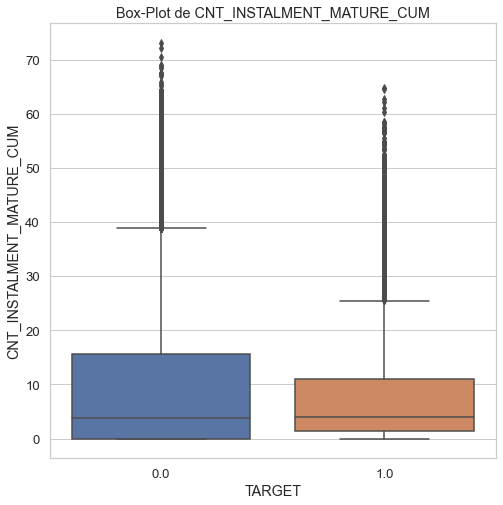

In [151]:
plot_continuous_variables(cc_balance_merged, 'CNT_INSTALMENT_MATURE_CUM', plots = ['box'], figsize = (8,8))

##### Observations et Conclusions

Nous voyons un comportement très intéressant. Ce graphique montre que les non-défaillants ont généralement une plage de valeurs plus élevée pour le nombre de versements payés par rapport aux défaillants. Cela pourrait montrer le comportement défaillant, où les défaillants paieraient généralement moins de versements sur leur crédit précédent.

## [5. Conclusions de l'EDA](#plan)<a class="anchor" id="5"></a>

À partir de l'analyse exploratoire exhaustive des données que nous avons effectuée, nous pouvons tirer des conclusions de haut niveau de notre ensemble de données donné.
<ol><li>Tout d'abord, l'ensemble de données devra être fusionné avec un moyen ingénieux pour que les données fusionnées aient un sens.</li>
    <li>Certaines catégories sont très bien discriminatoires entre les défaillants et les non défaillants, ce qui pourrait être important aux fins de la classification.</li>
    <li>Il y a peu de variables numériques continues qui contiennent des points erronés, nous aurions à gérer ces points.</li>
    <li>Nous avons également remarqué certaines fonctionnalités corrélées, qui ne feraient qu'augmenter la dimensionnalité des données et n'ajouteraient pas beaucoup de valeur. Nous voudrions supprimer ces fonctionnalités.</li>
    <li>Dans l'ensemble, l'ensemble de données est déséquilibré, et nous aurions besoin de trouver des techniques pour gérer un tel déséquilibre.</li>
    <li>Pour la prédiction du risque de défaut, les défaillants ont généralement tendance à avoir un comportement qui n'est pas normal et, par conséquent, nous ne pouvons pas supprimer les valeurs aberrantes ou les points éloignés, car ils peuvent suggérer une tendance importante au défaut. </li>
    <li>Avec toutes ces informations, nous allons passer à la tâche d'apprentissage des données et d'ingénierie des fonctionnalités.</li></ol>